In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)
# plt.rcParams['figure.dpi'] = 100
import re
import datetime as dt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.2f' % x)

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [2]:
retail_data=pd.read_excel('Online Retail.xlsx')
df=retail_data.copy()
df.sample(8)

InvoiceNo StockCode                         Description  Quantity  \
540294    581475     22956            36 FOIL HEART CAKE CASES        24   
62199     541497     21849     SILVER DIAMANTE PEN IN GIFT BOX         1   
517096    580029     23181      BULL DOG BOTTLE TOP WALL CLOCK         8   
481251    577358     21810    CHRISTMAS HANGING STAR WITH BELL        10   
274290    560895     23134     LARGE ZINC HEART WALL ORGANISER         8   
490332    578044     71477  COLOURED GLASS STAR T-LIGHT HOLDER        12   
244685    558540     21635              MADRAS NOTEBOOK LARGE         12   
415100    572513     21908       CHOCOLATE THIS WAY METAL SIGN         1   

               InvoiceDate  UnitPrice  CustomerID         Country  
540294 2011-12-09 08:39:00       0.79    13069.00  United Kingdom  
62199  2011-01-18 15:19:00       1.63         NaN  United Kingdom  
517096 2011-12-01 12:13:00       7.50    15380.00  United Kingdom  
481251 2011-11-18 15:59:00       0.83         NaN  United Kingdom  
274290 2011-07-21 17:12:00       7.05    13089.00  United Kingdom  
490332 2011-11-22 14:41:00       3.95    13488.00  United Kingdom  
244685 2011-06-30 12:15:00       1.25    17706.00  United Kingdom  
415100 2011-10-24 14:36:00       2.10    16728.00  United Kingdom

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


# Data Cleaning

## Eksik Değer

In [4]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = round((data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False),2)
    return pd.concat([total, percent],keys=['Total', 'Percent'], axis=1).reset_index().rename({'index':'Columns'},axis = 1)
missing_data(df)

Columns   Total  Percent
0   CustomerID  135080    24.93
1  Description    1454     0.27
2    InvoiceNo       0     0.00
3    StockCode       0     0.00
4     Quantity       0     0.00
5  InvoiceDate       0     0.00
6    UnitPrice       0     0.00
7      Country       0     0.00

In [5]:
def show_missing(df):
    """Return a Pandas dataframe describing the contents of a source dataframe including missing values."""
    
    variables = []
    dtypes = []
    count = []
    unique = []
    missing = []
    pc_missing = []
    
    for item in df.columns:
        variables.append(item)
        dtypes.append(df[item].dtype)
        count.append(len(df[item]))
        unique.append(len(df[item].unique()))
        missing.append(df[item].isna().sum())
        pc_missing.append(round((df[item].isna().sum() / len(df[item])) * 100, 2))

    output = pd.DataFrame({
        'variable': variables, 
        'dtype': dtypes,
        'count': count,
        'unique': unique,
        'missing': missing, 
        'pc_missing': pc_missing
    })    
        
    return output.sort_values("missing",ascending=False).reset_index(drop=True)
show_missing(df)

variable           dtype   count  unique  missing  pc_missing
0   CustomerID         float64  541909    4373   135080       24.93
1  Description          object  541909    4224     1454        0.27
2    InvoiceNo          object  541909   25900        0        0.00
3    StockCode          object  541909    4070        0        0.00
4     Quantity           int64  541909     722        0        0.00
5  InvoiceDate  datetime64[ns]  541909   23260        0        0.00
6    UnitPrice         float64  541909    1630        0        0.00
7      Country          object  541909      38        0        0.00

In [6]:
df[df['Description'].isna()]
# bunlarda fiyatlarda 0 gözukuyor  veri setidnen atarız  

InvoiceNo StockCode Description  Quantity         InvoiceDate  \
622       536414     22139         NaN        56 2010-12-01 11:52:00   
1970      536545     21134         NaN         1 2010-12-01 14:32:00   
1971      536546     22145         NaN         1 2010-12-01 14:33:00   
1972      536547     37509         NaN         1 2010-12-01 14:33:00   
1987      536549    85226A         NaN         1 2010-12-01 14:34:00   
...          ...       ...         ...       ...                 ...   
535322    581199     84581         NaN        -2 2011-12-07 18:26:00   
535326    581203     23406         NaN        15 2011-12-07 18:31:00   
535332    581209     21620         NaN         6 2011-12-07 18:35:00   
536981    581234     72817         NaN        27 2011-12-08 10:33:00   
538554    581408     85175         NaN        20 2011-12-08 14:06:00   

        UnitPrice  CustomerID         Country  
622          0.00         NaN  United Kingdom  
1970         0.00         NaN  United Kingdom  
1971         0.00         NaN  United Kingdom  
1972         0.00         NaN  United Kingdom  
1987         0.00         NaN  United Kingdom  
...           ...         ...             ...  
535322       0.00         NaN  United Kingdom  
535326       0.00         NaN  United Kingdom  
535332       0.00         NaN  United Kingdom  
536981       0.00         NaN  United Kingdom  
538554       0.00         NaN  United Kingdom  

[1454 rows x 8 columns]

In [7]:
df[df['Description'].isna()]['CustomerID'].value_counts(dropna=False)

NaN    1454
Name: CustomerID, dtype: int64

In [8]:
df[df['Description'].isna()]['UnitPrice'].value_counts(dropna=False)

0.00    1454
Name: UnitPrice, dtype: int64

* Bunların hepsinde fiyat 0 ve CustomerID NaN   oldugu için veri setidnen atarız 

In [9]:
df.dropna(subset=['Description'],inplace=True)

## Kopya Veri

In [10]:
df[df.duplicated(keep=False)]

InvoiceNo StockCode                       Description  Quantity  \
485       536409     22111      SCOTTIE DOG HOT WATER BOTTLE         1   
489       536409     22866     HAND WARMER SCOTTY DOG DESIGN         1   
494       536409     21866       UNION JACK FLAG LUGGAGE TAG         1   
517       536409     21866       UNION JACK FLAG LUGGAGE TAG         1   
521       536409     22900   SET 2 TEA TOWELS I LOVE LONDON          1   
...          ...       ...                               ...       ...   
541675    581538     22068       BLACK PIRATE TREASURE CHEST         1   
541689    581538     23318    BOX OF 6 MINI VINTAGE CRACKERS         1   
541692    581538     22992            REVOLVER WOODEN RULER          1   
541699    581538     22694                      WICKER STAR          1   
541701    581538     23343      JUMBO BAG VINTAGE CHRISTMAS          1   

               InvoiceDate  UnitPrice  CustomerID         Country  
485    2010-12-01 11:45:00       4.95    17908.00  United Kingdom  
489    2010-12-01 11:45:00       2.10    17908.00  United Kingdom  
494    2010-12-01 11:45:00       1.25    17908.00  United Kingdom  
517    2010-12-01 11:45:00       1.25    17908.00  United Kingdom  
521    2010-12-01 11:45:00       2.95    17908.00  United Kingdom  
...                    ...        ...         ...             ...  
541675 2011-12-09 11:34:00       0.39    14446.00  United Kingdom  
541689 2011-12-09 11:34:00       2.49    14446.00  United Kingdom  
541692 2011-12-09 11:34:00       1.95    14446.00  United Kingdom  
541699 2011-12-09 11:34:00       2.10    14446.00  United Kingdom  
541701 2011-12-09 11:34:00       2.08    14446.00  United Kingdom  

[10147 rows x 8 columns]

In [11]:
df[df.duplicated(keep=False)].loc[df.InvoiceNo == 536409]

InvoiceNo StockCode                       Description  Quantity  \
485    536409     22111      SCOTTIE DOG HOT WATER BOTTLE         1   
489    536409     22866     HAND WARMER SCOTTY DOG DESIGN         1   
494    536409     21866       UNION JACK FLAG LUGGAGE TAG         1   
517    536409     21866       UNION JACK FLAG LUGGAGE TAG         1   
521    536409     22900   SET 2 TEA TOWELS I LOVE LONDON          1   
527    536409     22866     HAND WARMER SCOTTY DOG DESIGN         1   
537    536409     22900   SET 2 TEA TOWELS I LOVE LONDON          1   
539    536409     22111      SCOTTIE DOG HOT WATER BOTTLE         1   

            InvoiceDate  UnitPrice  CustomerID         Country  
485 2010-12-01 11:45:00       4.95    17908.00  United Kingdom  
489 2010-12-01 11:45:00       2.10    17908.00  United Kingdom  
494 2010-12-01 11:45:00       1.25    17908.00  United Kingdom  
517 2010-12-01 11:45:00       1.25    17908.00  United Kingdom  
521 2010-12-01 11:45:00       2.95    17908.00  United Kingdom  
527 2010-12-01 11:45:00       2.10    17908.00  United Kingdom  
537 2010-12-01 11:45:00       2.95    17908.00  United Kingdom  
539 2010-12-01 11:45:00       4.95    17908.00  United Kingdom

* Kopya verileride veri setiden atıyoruz

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.describe().T

count     mean     std       min      25%      50%      75%  \
Quantity   535187.00     9.67  219.06 -80995.00     1.00     3.00    10.00   
UnitPrice  535187.00     4.65   97.36 -11062.06     1.25     2.08     4.13   
CustomerID 401604.00 15281.16 1714.01  12346.00 13939.00 15145.00 16784.00   

                max  
Quantity   80995.00  
UnitPrice  38970.00  
CustomerID 18287.00

* Ürün adeti ve ürün fiyatlarında eksi değerler var . Bunları düzelticez
* InvoiceNo iptal edilen siparişler var  Başına 'C' harfı konulmuş

## InvoiceNo

In [14]:
df.InvoiceNo = df.InvoiceNo.astype("str")
df['İptal_Edilen_Siparis']=df.apply(lambda x : 1 if 'C' in x['InvoiceNo'] else 0 , axis=1)

In [15]:
df[df['İptal_Edilen_Siparis']==1][['InvoiceNo','Description','Quantity','UnitPrice','CustomerID']]

InvoiceNo                       Description  Quantity  UnitPrice  \
141      C536379                          Discount        -1      27.50   
154      C536383   SET OF 3 COLOURED  FLYING DUCKS        -1       4.65   
235      C536391    PLASTERS IN TIN CIRCUS PARADE        -12       1.65   
236      C536391  PACK OF 12 PINK PAISLEY TISSUES        -24       0.29   
237      C536391  PACK OF 12 BLUE PAISLEY TISSUES        -24       0.29   
...          ...                               ...       ...        ...   
540449   C581490   ZINC T-LIGHT HOLDER STARS SMALL       -11       0.83   
541541   C581499                            Manual        -1     224.69   
541715   C581568        VICTORIAN SEWING BOX LARGE        -5      10.95   
541716   C581569  HANGING HEART JAR T-LIGHT HOLDER        -1       1.25   
541717   C581569     36 PENCILS TUBE RED RETROSPOT        -5       1.25   

        CustomerID  
141       14527.00  
154       15311.00  
235       17548.00  
236       17548.00  
237       17548.00  
...            ...  
540449    14397.00  
541541    15498.00  
541715    15311.00  
541716    17315.00  
541717    17315.00  

[9251 rows x 5 columns]

In [16]:
df[df['İptal_Edilen_Siparis']==1]['Quantity']

141       -1
154       -1
235      -12
236      -24
237      -24
          ..
540449   -11
541541    -1
541715    -5
541716    -1
541717    -5
Name: Quantity, Length: 9251, dtype: int64

In [17]:
(df[df['İptal_Edilen_Siparis']==1]['Quantity']> 0).value_counts()

False    9251
Name: Quantity, dtype: int64

In [18]:
df[df['İptal_Edilen_Siparis']==1]['UnitPrice']< 0

141       False
154       False
235       False
236       False
237       False
          ...  
540449    False
541541    False
541715    False
541716    False
541717    False
Name: UnitPrice, Length: 9251, dtype: bool

In [19]:
(df[df['İptal_Edilen_Siparis']==1]['UnitPrice']> 0).value_counts()

True    9251
Name: UnitPrice, dtype: int64

* İptal edilen siparişleri adet bilgilerin hepsi negatif degerler almıs

In [20]:
index_C = df[ df['İptal_Edilen_Siparis']== 1 ].index
index_C

Int64Index([   141,    154,    235,    236,    237,    238,    239,    240,
               241,    939,
            ...
            540141, 540142, 540176, 540422, 540448, 540449, 541541, 541715,
            541716, 541717],
           dtype='int64', length=9251)

In [21]:
df.drop(index_C,inplace=True)

In [22]:
df.drop('İptal_Edilen_Siparis',axis=1,inplace=True)

In [23]:
show_missing(df)

variable           dtype   count  unique  missing  pc_missing
0   CustomerID         float64  525936    4340   133204       25.33
1    InvoiceNo          object  525936   20610        0        0.00
2    StockCode          object  525936    3943        0        0.00
3  Description          object  525936    4207        0        0.00
4     Quantity           int64  525936     629        0        0.00
5  InvoiceDate  datetime64[ns]  525936   19019        0        0.00
6    UnitPrice         float64  525936    1293        0        0.00
7      Country          object  525936      38        0        0.00

##  StockCode

In [24]:
df.StockCode.value_counts()

85123A    2259
85099B    2112
22423     2012
47566     1700
20725     1582
          ... 
90112        1
84968f       1
85035b       1
85126        1
23843        1
Name: StockCode, Length: 3943, dtype: int64

* StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* Sona eklenen A B C bir anlamı olabilir mi ? 
* Veri setinin tanımının dışında verildiği için  veri setiden attım

In [25]:
df.StockCode.apply(lambda x: re.findall('[0-9]+', str(x))).str[0]

0         85123
1         71053
2         84406
3         84029
4         84029
          ...  
541904    22613
541905    22899
541906    23254
541907    23255
541908    22138
Name: StockCode, Length: 525936, dtype: object

In [26]:
df['New_StockCode']=df.StockCode.apply(lambda x: re.findall('[0-9]+', str(x))).str[0]
df['New_StockCode'].value_counts(dropna=False)

85099    3884
85123    2326
NaN      2204
47566    2171
22423    2012
         ... 
84612       1
44265       1
47579       1
21414       1
23843       1
Name: New_StockCode, Length: 3305, dtype: int64

In [27]:
df[df['New_StockCode'].isna()]

InvoiceNo StockCode     Description  Quantity         InvoiceDate  \
45        536370      POST         POSTAGE         3 2010-12-01 08:45:00   
386       536403      POST         POSTAGE         1 2010-12-01 11:27:00   
1123      536527      POST         POSTAGE         1 2010-12-01 13:04:00   
1814      536544       DOT  DOTCOM POSTAGE         1 2010-12-01 14:32:00   
2239      536569         M          Manual         1 2010-12-01 15:35:00   
...          ...       ...             ...       ...                 ...   
541216    581494      POST         POSTAGE         2 2011-12-09 10:13:00   
541540    581498       DOT  DOTCOM POSTAGE         1 2011-12-09 10:26:00   
541730    581570      POST         POSTAGE         1 2011-12-09 11:59:00   
541767    581574      POST         POSTAGE         2 2011-12-09 12:09:00   
541768    581578      POST         POSTAGE         3 2011-12-09 12:16:00   

        UnitPrice  CustomerID         Country New_StockCode  
45          18.00    12583.00          France           NaN  
386         15.00    12791.00     Netherlands           NaN  
1123        18.00    12662.00         Germany           NaN  
1814       569.77         NaN  United Kingdom           NaN  
2239         1.25    16274.00  United Kingdom           NaN  
...           ...         ...             ...           ...  
541216      18.00    12518.00         Germany           NaN  
541540    1714.17         NaN  United Kingdom           NaN  
541730      18.00    12662.00         Germany           NaN  
541767      18.00    12526.00         Germany           NaN  
541768      18.00    12713.00         Germany           NaN  

[2204 rows x 9 columns]

In [28]:
drop_indexs=df[df['New_StockCode'].isna()].index
drop_indexs

Int64Index([    45,    386,   1123,   1814,   2239,   2250,   3041,   4406,
              5073,   5258,
            ...
            537462, 538321, 539368, 540908, 541198, 541216, 541540, 541730,
            541767, 541768],
           dtype='int64', length=2204)

In [29]:
df.drop(index=drop_indexs,inplace=True)

In [30]:
df['New_StockCode'].value_counts(dropna=False)

85099    3884
85123    2326
47566    2171
22423    2012
85049    1776
         ... 
77079       1
82615       1
90112       1
85126       1
23843       1
Name: New_StockCode, Length: 3304, dtype: int64

* 3304 farklı ürün kodu var

## Description

In [31]:
df['Description'].value_counts(dropna=False)

WHITE HANGING HEART T-LIGHT HOLDER    2315
JUMBO BAG RED RETROSPOT               2112
REGENCY CAKESTAND 3 TIER              2009
PARTY BUNTING                         1700
LUNCH BAG RED RETROSPOT               1581
                                      ... 
PINK/WHITE GLASS DEMI CHOKER             1
BELL HEART ANTIQUE GOLD                  1
mouldy, unsaleable.                      1
mix up with c                            1
PAPER CRAFT , LITTLE BIRDIE              1
Name: Description, Length: 4197, dtype: int64

* 4197 farklı ürün adı var 

## Quantity

In [32]:
df['Quantity'].value_counts(dropna=False)

 1        143081
 2         80847
 12        60828
 6         40576
 4         38256
           ...  
 828           1
 701           1
 155           1
-1681          1
 80995         1
Name: Quantity, Length: 628, dtype: int64

In [33]:
df[df['Quantity']<=0]

InvoiceNo StockCode Description  Quantity         InvoiceDate  \
7313      537032     21275           ?       -30 2010-12-03 16:50:00   
13217     537425    84968F       check       -20 2010-12-06 15:35:00   
13218     537426    84968E       check       -35 2010-12-06 15:36:00   
13264     537432    35833G     damages       -43 2010-12-06 16:10:00   
21338     538072     22423      faulty       -13 2010-12-09 14:10:00   
...          ...       ...         ...       ...                 ...   
535333    581210     23395       check       -26 2011-12-07 18:36:00   
535335    581212     22578        lost     -1050 2011-12-07 18:38:00   
535336    581213     22576       check       -30 2011-12-07 18:38:00   
536908    581226     23090     missing      -338 2011-12-08 09:56:00   
538919    581422     23169     smashed      -235 2011-12-08 15:24:00   

        UnitPrice  CustomerID         Country New_StockCode  
7313         0.00         NaN  United Kingdom         21275  
13217        0.00         NaN  United Kingdom         84968  
13218        0.00         NaN  United Kingdom         84968  
13264        0.00         NaN  United Kingdom         35833  
21338        0.00         NaN  United Kingdom         22423  
...           ...         ...             ...           ...  
535333       0.00         NaN  United Kingdom         23395  
535335       0.00         NaN  United Kingdom         22578  
535336       0.00         NaN  United Kingdom         22576  
536908       0.00         NaN  United Kingdom         23090  
538919       0.00         NaN  United Kingdom         23169  

[474 rows x 9 columns]

* Ürün adeti eksi olan verilerin diger sütünlarda da sıkıntı var onları attım

In [34]:
drop_indexs=df[df['Quantity']<=0]['UnitPrice'].index
drop_indexs

Int64Index([  7313,  13217,  13218,  13264,  21338,  21518,  22296,  22297,
             42564,  42566,
            ...
            535327, 535328, 535329, 535330, 535331, 535333, 535335, 535336,
            536908, 538919],
           dtype='int64', length=474)

In [35]:
df.drop(index=drop_indexs,inplace=True)

In [36]:
df['Quantity'].describe()

count   523258.00
mean        10.71
std        157.70
min          1.00
25%          1.00
50%          4.00
75%         12.00
max      80995.00
Name: Quantity, dtype: float64

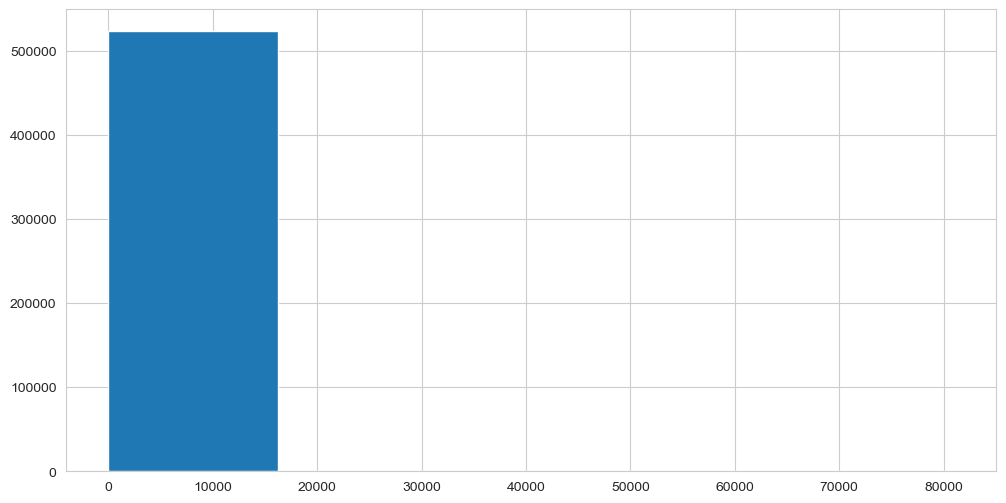

In [37]:
plt.hist(df['Quantity'],bins=5);

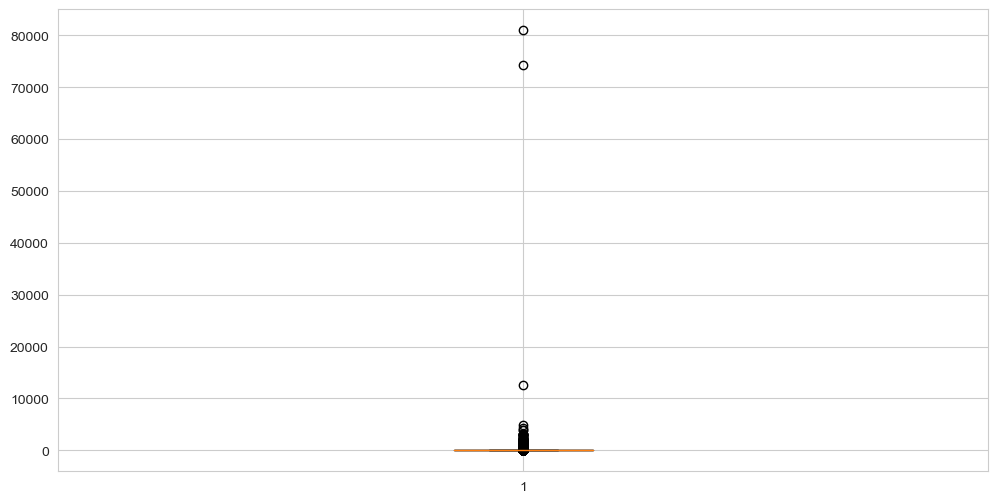

In [38]:
plt.boxplot(df['Quantity']);

In [39]:
q3, q1 = np.percentile(df.Quantity, [75, 25])

iqr = q3 - q1

print(q3, q1, iqr)

upper_limit = q3 + iqr *1.5

lower_limit = q1 - iqr *1.5

print(upper_limit,lower_limit)

12.0 1.0 11.0
28.5 -15.5


In [40]:
len(df[df['Quantity']<=29]) / len(df['Quantity']) 

0.9486849699383478

In [41]:
df[df['Quantity']>29]

InvoiceNo StockCode                       Description  Quantity  \
9         536367     84879     ASSORTED COLOUR BIRD ORNAMENT        32   
31        536370     10002       INFLATABLE POLITICAL GLOBE         48   
44        536370     22492           MINI PAINT SET VINTAGE         36   
46        536371     22086   PAPER CHAIN KIT 50'S CHRISTMAS         80   
65        536374     21258        VICTORIAN SEWING BOX LARGE        32   
...          ...       ...                               ...       ...   
541835    581579     23581            JUMBO BAG PAISLEY PARK        40   
541865    581583     20725           LUNCH BAG RED RETROSPOT        40   
541866    581583     85038   6 CHOCOLATE LOVE HEART T-LIGHTS        36   
541867    581584     20832  RED FLOCK LOVE HEART PHOTO FRAME        72   
541868    581584     85038   6 CHOCOLATE LOVE HEART T-LIGHTS        48   

               InvoiceDate  UnitPrice  CustomerID         Country  \
9      2010-12-01 08:34:00       1.69    13047.00  United Kingdom   
31     2010-12-01 08:45:00       0.85    12583.00          France   
44     2010-12-01 08:45:00       0.65    12583.00          France   
46     2010-12-01 09:00:00       2.55    13748.00  United Kingdom   
65     2010-12-01 09:09:00      10.95    15100.00  United Kingdom   
...                    ...        ...         ...             ...   
541835 2011-12-09 12:19:00       1.79    17581.00  United Kingdom   
541865 2011-12-09 12:23:00       1.45    13777.00  United Kingdom   
541866 2011-12-09 12:23:00       1.85    13777.00  United Kingdom   
541867 2011-12-09 12:25:00       0.72    13777.00  United Kingdom   
541868 2011-12-09 12:25:00       1.85    13777.00  United Kingdom   

       New_StockCode  
9              84879  
31             10002  
44             22492  
46             22086  
65             21258  
...              ...  
541835         23581  
541865         20725  
541866         85038  
541867         20832  
541868         85038  

[26851 rows x 9 columns]

In [42]:
drop_indexs=df[df['Quantity']>29].index
drop_indexs

Int64Index([     9,     31,     44,     46,     65,     82,     83,     96,
               101,    102,
            ...
            541746, 541747, 541751, 541812, 541833, 541835, 541865, 541866,
            541867, 541868],
           dtype='int64', length=26851)

In [43]:
df.drop(drop_indexs,inplace=True)

* Bunlar aykırı veride olsa doğru olan veri silmek veya silmemek arasında kaldım.Bunu bir üstüme sorardım

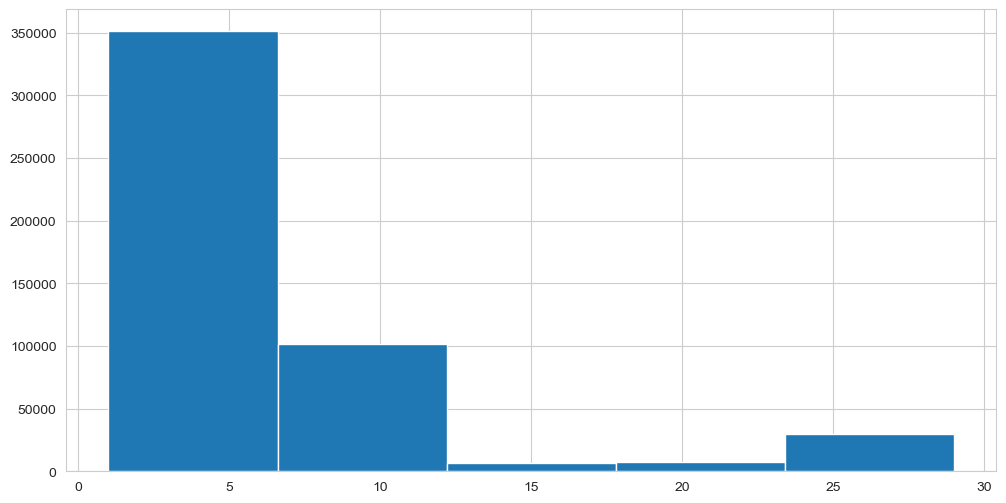

In [44]:
plt.hist(df['Quantity'],bins=5);

##  InvoiceDate

In [45]:
df['InvoiceDate'].value_counts(dropna=False)

2011-10-31 14:41:00    1096
2011-12-08 09:28:00     746
2011-12-09 10:03:00     726
2011-12-05 17:24:00     712
2011-11-30 15:13:00     684
                       ... 
2011-03-02 13:56:00       1
2011-11-24 12:24:00       1
2011-03-02 14:58:00       1
2011-03-02 16:35:00       1
2011-11-28 09:14:00       1
Name: InvoiceDate, Length: 17321, dtype: int64

In [46]:
df['InvoiceDate'].min()

Timestamp('2010-12-01 08:26:00')

In [47]:
df['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

## UnitPrice

In [48]:
df[df['UnitPrice']<=0]

InvoiceNo StockCode                       Description  Quantity  \
6391      536941     22734                            amazon        20   
6392      536942     22139                            amazon        15   
9302      537197     22841      ROUND CAKE TIN VINTAGE GREEN         1   
14335     537534     85064      CREAM SWEETHEART LETTER RACK         1   
14336     537534     84832  ZINC WILLIE WINKIE  CANDLE STICK         1   
...          ...       ...                               ...       ...   
522245    580390     21888                            Amazon         1   
522246    580391     21868                            Amazon         1   
524474    580586     21804                            dotcom         4   
524622    580609     22927                            Amazon         1   
535334    581211     22142                             check        14   

               InvoiceDate  UnitPrice  CustomerID         Country  \
6391   2010-12-03 12:08:00       0.00         NaN  United Kingdom   
6392   2010-12-03 12:08:00       0.00         NaN  United Kingdom   
9302   2010-12-05 14:02:00       0.00    12647.00         Germany   
14335  2010-12-07 11:48:00       0.00         NaN  United Kingdom   
14336  2010-12-07 11:48:00       0.00         NaN  United Kingdom   
...                    ...        ...         ...             ...   
522245 2011-12-04 10:37:00       0.00         NaN  United Kingdom   
522246 2011-12-04 10:42:00       0.00         NaN  United Kingdom   
524474 2011-12-05 10:34:00       0.00         NaN  United Kingdom   
524622 2011-12-05 11:41:00       0.00         NaN  United Kingdom   
535334 2011-12-07 18:36:00       0.00         NaN  United Kingdom   

       New_StockCode  
6391           22734  
6392           22139  
9302           22841  
14335          85064  
14336          84832  
...              ...  
522245         21888  
522246         21868  
524474         21804  
524622         22927  
535334         22142  

[477 rows x 9 columns]

In [49]:
df[df['UnitPrice']<=0]['UnitPrice'].value_counts(dropna=False)

0.00    477
Name: UnitPrice, dtype: int64

In [50]:
df[df['UnitPrice']<=0]['Description'].value_counts(dropna=False)

check                                 28
adjustment                            11
found                                  9
FRENCH BLUE METAL DOOR SIGN 1          9
FRENCH BLUE METAL DOOR SIGN 8          8
                                      ..
VINTAGE HEADS AND TAILS CARD GAME      1
RED RETROSPOT TEA CUP AND SAUCER       1
DOORSTOP RACING CAR DESIGN             1
CHILDRENS GARDEN GLOVES PINK           1
CLASSIC GLASS COOKIE JAR               1
Name: Description, Length: 208, dtype: int64

In [51]:
df[df['Description']=='check']

InvoiceNo StockCode Description  Quantity         InvoiceDate  \
424304    573255    85135B       check         3 2011-10-28 12:18:00   
431798    573751    46000U       check        10 2011-11-01 09:33:00   
433458    573920     84050       check        14 2011-11-01 18:00:00   
433687    573978     21644       check        27 2011-11-02 11:02:00   
433688    573979     35968       check         9 2011-11-02 11:02:00   
433689    573980     21539       check         4 2011-11-02 11:03:00   
433690    573981     21700       check        26 2011-11-02 11:05:00   
433692    573983     82600       check         3 2011-11-02 11:08:00   
433693    573984    16207A       check         2 2011-11-02 11:09:00   
433694    573985     22848       check         2 2011-11-02 11:09:00   
433695    573986    84659A       check        19 2011-11-02 11:13:00   
433696    573987     21349       check         1 2011-11-02 11:14:00   
433697    573988     22925       check         1 2011-11-02 11:14:00   
433698    573989     23091       check         2 2011-11-02 11:14:00   
433699    573990     22606       check         1 2011-11-02 11:18:00   
454350    575518     10080       check        22 2011-11-10 10:53:00   
456828    575719     35954       check        24 2011-11-10 18:08:00   
468299    576414    17012F       check        14 2011-11-15 11:21:00   
472843    576766    85019B       check        15 2011-11-16 13:11:00   
489147    577942     21811       check        26 2011-11-22 12:08:00   
489149    577947     21992       check        13 2011-11-22 12:08:00   
489195    577953     23348       check         5 2011-11-22 12:09:00   
489196    577954    17136A       check         3 2011-11-22 12:10:00   
499785    578691    85034A       check        24 2011-11-25 09:37:00   
516171    579873    35819B       check        18 2011-11-30 17:00:00   
516188    579879     22759       check        17 2011-11-30 17:13:00   
522157    580376     22606       check         8 2011-12-02 17:49:00   
535334    581211     22142       check        14 2011-12-07 18:36:00   

        UnitPrice  CustomerID         Country New_StockCode  
424304       0.00         NaN  United Kingdom         85135  
431798       0.00         NaN  United Kingdom         46000  
433458       0.00         NaN  United Kingdom         84050  
433687       0.00         NaN  United Kingdom         21644  
433688       0.00         NaN  United Kingdom         35968  
433689       0.00         NaN  United Kingdom         21539  
433690       0.00         NaN  United Kingdom         21700  
433692       0.00         NaN  United Kingdom         82600  
433693       0.00         NaN  United Kingdom         16207  
433694       0.00         NaN  United Kingdom         22848  
433695       0.00         NaN  United Kingdom         84659  
433696       0.00         NaN  United Kingdom         21349  
433697       0.00         NaN  United Kingdom         22925  
433698       0.00         NaN  United Kingdom         23091  
433699       0.00         NaN  United Kingdom         22606  
454350       0.00         NaN  United Kingdom         10080  
456828       0.00         NaN  United Kingdom         35954  
468299       0.00         NaN  United Kingdom         17012  
472843       0.00         NaN  United Kingdom         85019  
489147       0.00         NaN  United Kingdom         21811  
489149       0.00         NaN  United Kingdom         21992  
489195       0.00         NaN  United Kingdom         23348  
489196       0.00         NaN  United Kingdom         17136  
499785       0.00         NaN  United Kingdom         85034  
516171       0.00         NaN  United Kingdom         35819  
516188       0.00         NaN  United Kingdom         22759  
522157       0.00         NaN  United Kingdom         22606  
535334       0.00         NaN  United Kingdom         22142

* Fiyatları 0 dan küçük olan ürünleri attım.Diğer sütünlarda da sıkıntı var 

In [52]:
df[df['UnitPrice']<=0]

InvoiceNo StockCode                       Description  Quantity  \
6391      536941     22734                            amazon        20   
6392      536942     22139                            amazon        15   
9302      537197     22841      ROUND CAKE TIN VINTAGE GREEN         1   
14335     537534     85064      CREAM SWEETHEART LETTER RACK         1   
14336     537534     84832  ZINC WILLIE WINKIE  CANDLE STICK         1   
...          ...       ...                               ...       ...   
522245    580390     21888                            Amazon         1   
522246    580391     21868                            Amazon         1   
524474    580586     21804                            dotcom         4   
524622    580609     22927                            Amazon         1   
535334    581211     22142                             check        14   

               InvoiceDate  UnitPrice  CustomerID         Country  \
6391   2010-12-03 12:08:00       0.00         NaN  United Kingdom   
6392   2010-12-03 12:08:00       0.00         NaN  United Kingdom   
9302   2010-12-05 14:02:00       0.00    12647.00         Germany   
14335  2010-12-07 11:48:00       0.00         NaN  United Kingdom   
14336  2010-12-07 11:48:00       0.00         NaN  United Kingdom   
...                    ...        ...         ...             ...   
522245 2011-12-04 10:37:00       0.00         NaN  United Kingdom   
522246 2011-12-04 10:42:00       0.00         NaN  United Kingdom   
524474 2011-12-05 10:34:00       0.00         NaN  United Kingdom   
524622 2011-12-05 11:41:00       0.00         NaN  United Kingdom   
535334 2011-12-07 18:36:00       0.00         NaN  United Kingdom   

       New_StockCode  
6391           22734  
6392           22139  
9302           22841  
14335          85064  
14336          84832  
...              ...  
522245         21888  
522246         21868  
524474         21804  
524622         22927  
535334         22142  

[477 rows x 9 columns]

In [53]:
drop_indexs=df[df['UnitPrice']<=0].index
drop_indexs

Int64Index([  6391,   6392,   9302,  14335,  14336,  14337,  14338,  14339,
             14340,  14341,
            ...
            516188, 519355, 521408, 521417, 522157, 522245, 522246, 524474,
            524622, 535334],
           dtype='int64', length=477)

In [54]:
df.drop(index=drop_indexs,inplace=True)

In [55]:
df.describe()['UnitPrice']

count   495930.00
mean         3.38
std          4.46
min          0.06
25%          1.25
50%          2.10
75%          4.13
max        649.50
Name: UnitPrice, dtype: float64

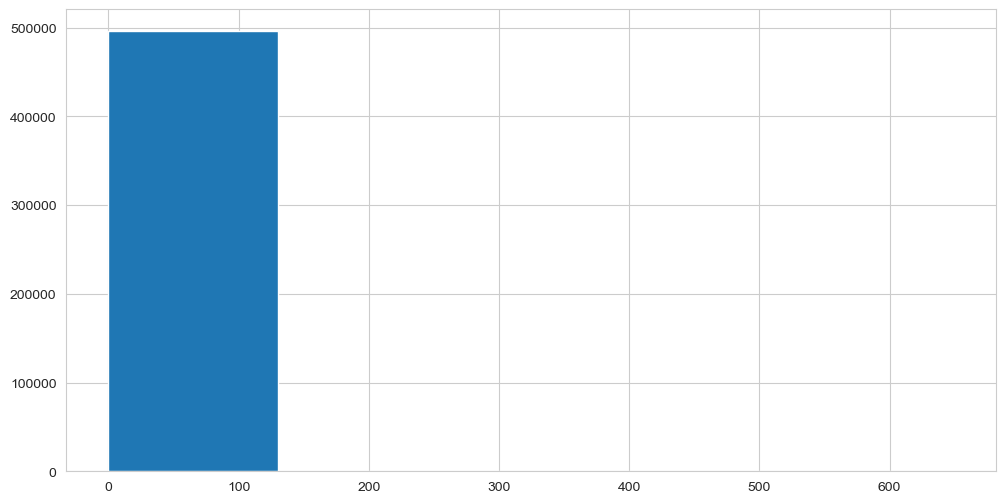

In [56]:
plt.hist(df['UnitPrice'],bins=5);

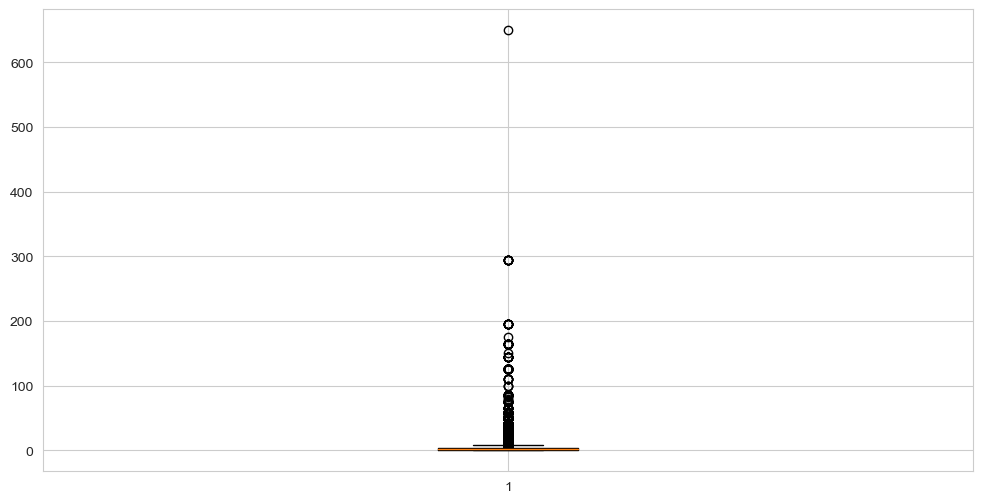

In [57]:
plt.boxplot(df['UnitPrice']);

In [58]:
q3, q1 = np.percentile(df.UnitPrice, [75, 25])

iqr = q3 - q1

print(q3, q1, iqr)

upper_limit = q3 + iqr *1.5

lower_limit = q1 - iqr *1.5

print(upper_limit,lower_limit)

4.13 1.25 2.88
8.45 -3.0700000000000003


In [59]:
len(df[df['UnitPrice']<=9]) / len(df['UnitPrice']) 

0.9428971830701913

In [60]:
drop_indexs=df[df['UnitPrice']>9].index
drop_indexs

Int64Index([    16,    151,    152,    153,    163,    167,    168,    246,
               252,    294,
            ...
            541527, 541533, 541539, 541543, 541734, 541744, 541762, 541763,
            541786, 541849],
           dtype='int64', length=28319)

In [61]:
df.drop(drop_indexs,inplace=True)

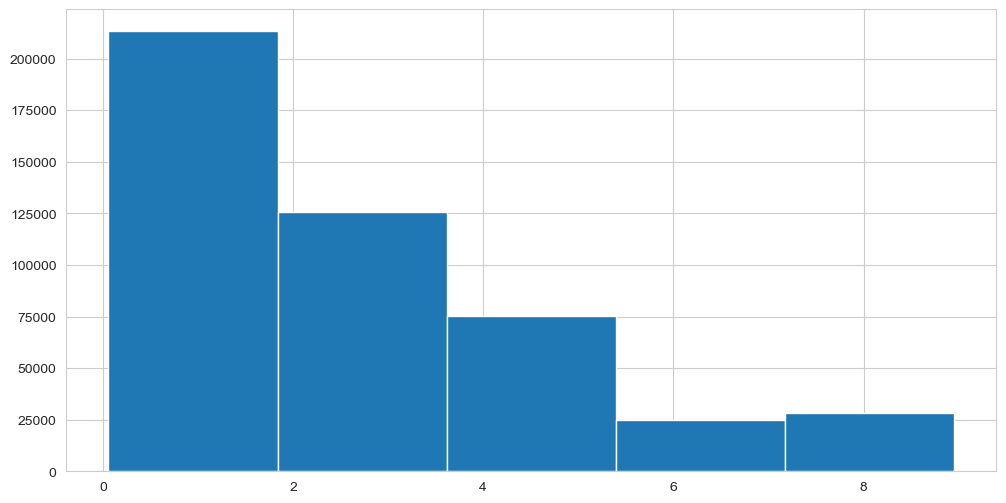

In [62]:
plt.hist(df['UnitPrice'],bins=5);

* Bunlar aykırı veride olsa doğru olan veri silmek veya silmemek arasında kaldım.Bunu bir üstüme sorardım  

##  CustomerID

In [63]:
show_missing(df)

variable           dtype   count  unique  missing  pc_missing
0     CustomerID         float64  467611    4203   116742       24.97
1      InvoiceNo          object  467611   18302        0        0.00
2      StockCode          object  467611    3742        0        0.00
3    Description          object  467611    3846        0        0.00
4       Quantity           int64  467611      29        0        0.00
5    InvoiceDate  datetime64[ns]  467611   17049        0        0.00
6      UnitPrice         float64  467611     273        0        0.00
7        Country          object  467611      38        0        0.00
8  New_StockCode          object  467611    3154        0        0.00

In [64]:
df[df['CustomerID'].isna()]

InvoiceNo StockCode                      Description  Quantity  \
1443      536544     21773  DECORATIVE ROSE BATHROOM BOTTLE         1   
1444      536544     21774  DECORATIVE CATS BATHROOM BOTTLE         2   
1445      536544     21786               POLKADOT RAIN HAT          4   
1446      536544     21787            RAIN PONCHO RETROSPOT         2   
1447      536544     21790               VINTAGE SNAP CARDS         9   
...          ...       ...                              ...       ...   
541534    581498    85049a    TRADITIONAL CHRISTMAS RIBBONS         5   
541535    581498    85049e        SCANDINAVIAN REDS RIBBONS         4   
541536    581498    85099B          JUMBO BAG RED RETROSPOT         5   
541537    581498    85099C   JUMBO  BAG BAROQUE BLACK WHITE         4   
541538    581498     85150    LADIES & GENTLEMEN METAL SIGN         1   

               InvoiceDate  UnitPrice  CustomerID         Country  \
1443   2010-12-01 14:32:00       2.51         NaN  United Kingdom   
1444   2010-12-01 14:32:00       2.51         NaN  United Kingdom   
1445   2010-12-01 14:32:00       0.85         NaN  United Kingdom   
1446   2010-12-01 14:32:00       1.66         NaN  United Kingdom   
1447   2010-12-01 14:32:00       1.66         NaN  United Kingdom   
...                    ...        ...         ...             ...   
541534 2011-12-09 10:26:00       3.29         NaN  United Kingdom   
541535 2011-12-09 10:26:00       3.29         NaN  United Kingdom   
541536 2011-12-09 10:26:00       4.13         NaN  United Kingdom   
541537 2011-12-09 10:26:00       4.13         NaN  United Kingdom   
541538 2011-12-09 10:26:00       4.96         NaN  United Kingdom   

       New_StockCode  
1443           21773  
1444           21774  
1445           21786  
1446           21787  
1447           21790  
...              ...  
541534         85049  
541535         85049  
541536         85099  
541537         85099  
541538         85150  

[116742 rows x 9 columns]

* Müşteri analizi yapacıgımız için veri setidnen attım.
* Diger analizler için tutulabilirmiydi ? 

In [65]:
drop_indexs=df[df['CustomerID'].isna()].index
drop_indexs

Int64Index([  1443,   1444,   1445,   1446,   1447,   1448,   1449,   1450,
              1451,   1452,
            ...
            541528, 541529, 541530, 541531, 541532, 541534, 541535, 541536,
            541537, 541538],
           dtype='int64', length=116742)

In [66]:
df.drop(drop_indexs,inplace=True)

In [67]:
show_missing(df)

variable           dtype   count  unique  missing  pc_missing
0      InvoiceNo          object  350869   16965        0        0.00
1      StockCode          object  350869    3507        0        0.00
2    Description          object  350869    3700        0        0.00
3       Quantity           int64  350869      29        0        0.00
4    InvoiceDate  datetime64[ns]  350869   15901        0        0.00
5      UnitPrice         float64  350869     188        0        0.00
6     CustomerID         float64  350869    4202        0        0.00
7        Country          object  350869      37        0        0.00
8  New_StockCode          object  350869    3058        0        0.00

##  Country

In [68]:
df['Country'].value_counts(dropna=False)

United Kingdom          315832
Germany                   7831
France                    7250
EIRE                      5863
Spain                     2152
Belgium                   1748
Switzerland               1553
Portugal                  1293
Norway                     836
Netherlands                680
Italy                      663
Channel Islands            648
Australia                  560
Finland                    559
Cyprus                     518
Austria                    356
Denmark                    302
Poland                     288
Sweden                     254
Unspecified                227
Israel                     201
Iceland                    167
USA                        163
Singapore                  159
Greece                     133
Canada                     130
Japan                      113
Malta                       94
United Arab Emirates        59
European Community          52
RSA                         50
Lebanon                     37
Brazil  

* Satısların cogu ingiltereden yapılmış

## Feature Engineering

In [69]:
df['New_Country'] = df.apply(lambda x: 'United Kingdom' if x['Country']== 'United Kingdom' else 'Other Country',axis=1)
df['Year'] = df['InvoiceDate'].dt.strftime("%Y")
df['Month'] = df['InvoiceDate'].dt.strftime("%m")
df['Weekday'] = df['InvoiceDate'].dt.strftime("%w")
df['Day'] = df['InvoiceDate'].dt.strftime("%d")
df['Hour'] = df['InvoiceDate'].dt.strftime("%H")
df['TotalPrice'] = df['Quantity']*df['UnitPrice']
df['CustomerID'] = df['CustomerID'].astype('int')

In [70]:
df.sample(5)

InvoiceNo StockCode                       Description  Quantity  \
179884    552290     20984         12 PENCILS TALL TUBE POSY         2   
461910    575955     23112          PARISIENNE CURIO CABINET         1   
472676    576695     20982       12 PENCILS TALL TUBE SKULLS         1   
119047    546520     22623     BOX OF VINTAGE JIGSAW BLOCKS          3   
513887    579619     21174  POTTERING IN THE SHED METAL SIGN        12   

               InvoiceDate  UnitPrice  CustomerID         Country  \
179884 2011-05-08 13:32:00       0.85       16007  United Kingdom   
461910 2011-11-13 12:05:00       7.50       14044  United Kingdom   
472676 2011-11-16 12:25:00       0.85       16469  United Kingdom   
119047 2011-03-14 12:28:00       4.95       14911            EIRE   
513887 2011-11-30 12:10:00       2.08       18241  United Kingdom   

       New_StockCode     New_Country  Year Month Weekday Day Hour  TotalPrice  
179884         20984  United Kingdom  2011    05       0  08   13        1.70  
461910         23112  United Kingdom  2011    11       0  13   12        7.50  
472676         20982  United Kingdom  2011    11       3  16   12        0.85  
119047         22623   Other Country  2011    03       1  14   12       14.85  
513887         21174  United Kingdom  2011    11       3  30   12       24.96

# Exploratory Data Analysis

In [71]:
show_missing(df)

variable           dtype   count  unique  missing  pc_missing
0       InvoiceNo          object  350869   16965        0        0.00
1       StockCode          object  350869    3507        0        0.00
2     Description          object  350869    3700        0        0.00
3        Quantity           int64  350869      29        0        0.00
4     InvoiceDate  datetime64[ns]  350869   15901        0        0.00
5       UnitPrice         float64  350869     188        0        0.00
6      CustomerID           int32  350869    4202        0        0.00
7         Country          object  350869      37        0        0.00
8   New_StockCode          object  350869    3058        0        0.00
9     New_Country          object  350869       2        0        0.00
10           Year          object  350869       2        0        0.00
11          Month          object  350869      12        0        0.00
12        Weekday          object  350869       6        0        0.00
13            Day          object  350869      31        0        0.00
14           Hour          object  350869      15        0        0.00
15     TotalPrice         float64  350869    1263        0        0.00

In [72]:
df.describe().T

count     mean     std      min      25%      50%      75%  \
Quantity   350869.00     7.31    6.73     1.00     2.00     5.00    12.00   
UnitPrice  350869.00     2.50    2.00     0.06     1.25     1.85     3.25   
CustomerID 350869.00 15315.68 1709.39 12347.00 13986.00 15218.00 16813.00   
TotalPrice 350869.00    13.38   14.06     0.06     4.20    10.20    17.40   

                max  
Quantity      29.00  
UnitPrice      8.95  
CustomerID 18287.00  
TotalPrice   246.50

## Müşteri

* Find the unique number of InvoiceNo per customer?
* What's the average number of unqiue items per order or per customer?
* Let's see how this compares to the number of unique products per customer.

In [73]:
#Find the unique number of InvoiceNo per customer?

df_customer=df.groupby(['CustomerID']).agg({'InvoiceNo':[np.size,np.unique],'Quantity': ['sum'],'TotalPrice':['sum']})

df_customer.columns = ['InvoiceNo_size','InvoiceNo_unique','Quantity_sum', 'TotalPrice_sum']

df_customer['len_InvoiceNo_unique']= df_customer['InvoiceNo_unique'].apply(lambda x : len(x))

df_customer = df_customer.reset_index()

df_customer

CustomerID  InvoiceNo_size  \
0          12347             167   
1          12348               6   
2          12349              64   
3          12350              16   
4          12352              71   
...          ...             ...   
4197       18280               9   
4198       18281               5   
4199       18282               8   
4200       18283             717   
4201       18287              51   

                                       InvoiceNo_unique  Quantity_sum  \
0     [537626, 542237, 549222, 556201, 562032, 57351...          1905   
1                              [539318, 541998, 548955]           140   
2                                              [577609]           547   
3                                              [543037]           196   
4     [544156, 545323, 546869, 547390, 567505, 56869...           512   
...                                                 ...           ...   
4197                                           [545712]            43   
4198                                           [556464]            52   
4199                                   [562525, 580173]            51   
4200  [540350, 541854, 545079, 550957, 554157, 55673...          1353   
4201                           [554065, 570715, 573167]           782   

      TotalPrice_sum  len_InvoiceNo_unique  
0            3412.53                     7  
1              90.20                     3  
2            1197.15                     1  
3             294.40                     1  
4            1232.44                     7  
...              ...                   ...  
4197          160.70                     1  
4198           46.92                     1  
4199          113.13                     2  
4200         2013.68                    16  
4201          994.76                     3  

[4202 rows x 6 columns]

In [74]:
df[df['CustomerID']==12349]

InvoiceNo StockCode                          Description  Quantity  \
485502    577609     23112             PARISIENNE CURIO CABINET         2   
485504    577609     21564       PINK  HEART SHAPE LOVE BUCKET          6   
485505    577609     21411          GINGHAM HEART  DOORSTOP RED         3   
485506    577609     21563         RED HEART SHAPE LOVE BUCKET          6   
485507    577609     22131     FOOD CONTAINER SET 3 LOVE HEART          6   
485508    577609     22195         LARGE HEART MEASURING SPOONS        12   
485509    577609     48194                       DOORMAT HEARTS         2   
485510    577609     84978     HANGING HEART JAR T-LIGHT HOLDER        12   
485512    577609     22557     PLASTERS IN TIN VINTAGE PAISLEY         12   
485513    577609     23198       PANTRY MAGNETIC  SHOPPING LIST        12   
485514    577609     22666      RECIPE BOX PANTRY YELLOW DESIGN         6   
485515    577609     22720    SET OF 3 CAKE TINS PANTRY DESIGN          3   
485516    577609     22960             JAM MAKING SET WITH JARS         6   
485517    577609     22722    SET OF 6 SPICE TINS PANTRY DESIGN         4   
485518    577609     23113                PANTRY CHOPPING BOARD         3   
485519    577609     22692          DOORMAT WELCOME TO OUR HOME         4   
485521    577609     22071    SMALL WHITE RETROSPOT MUG IN BOX          6   
485522    577609    85014A         BLACK/BLUE POLKADOT UMBRELLA         3   
485523    577609     22567              20 DOLLY PEGS RETROSPOT        12   
485526    577609     20914  SET/5 RED RETROSPOT LID GLASS BOWLS         6   
485527    577609     20685                DOORMAT RED RETROSPOT         6   
485528    577609     21086          SET/6 RED SPOTTY PAPER CUPS        12   
485529    577609     21535         RED RETROSPOT SMALL MILK JUG         6   
485530    577609     21531         RED RETROSPOT SUGAR JAM BOWL         6   
485531    577609     21533             RETROSPOT LARGE MILK JUG         3   
485532    577609     22070      SMALL RED RETROSPOT MUG IN BOX          6   
485533    577609     21787                RAIN PONCHO RETROSPOT        24   
485534    577609    85014B               RED RETROSPOT UMBRELLA         3   
485535    577609     22553               PLASTERS IN TIN SKULLS        12   
485537    577609     23293    SET OF 12 FAIRY CAKE BAKING CASES         8   
485538    577609     23296       SET OF 6 TEA TIME BAKING CASES         8   
485539    577609     23294     SET OF 6 SNACK LOAF BAKING CASES         8   
485540    577609     23545               WRAP RED VINTAGE DOILY        25   
485541    577609     23295     SET OF 12 MINI LOAF BAKING CASES         8   
485542    577609     23236           STORAGE TIN VINTAGE DOILY          6   
485543    577609     23240     SET OF 4 KNICK KNACK TINS DOILY          6   
485544    577609     23283                 DOORMAT VINTAGE LEAF         2   
485545    577609     22326  ROUND SNACK BOXES SET OF4 WOODLAND          6   
485546    577609     22554     PLASTERS IN TIN WOODLAND ANIMALS        12   
485547    577609     22555            PLASTERS IN TIN STRONGMAN        12   
485548    577609     22333    RETROSPOT PARTY BAG + STICKER SET         8   
485549    577609     23493      VINTAGE DOILY TRAVEL SEWING KIT        10   
485550    577609     23494     VINTAGE DOILY DELUXE SEWING KIT          3   
485551    577609     23497         CLASSIC CHROME BICYCLE BELL         12   
485552    577609     23514       EMBROIDERED RIBBON REEL SALLY          6   
485553    577609     21136         PAINTED METAL PEARS ASSORTED        16   
485554    577609     22704                     WRAP RED APPLES         25   
485555    577609     22601       CHRISTMAS RETROSPOT ANGEL WOOD        12   
485556    577609     23263    SET OF 3 WOODEN HEART DECORATIONS        12   
485557    577609     23273   HEART T-LIGHT HOLDER WILLIE WINKIE        12   
485558    577609     23439           HAND WARMER RED LOVE HEART        12   
485

In [75]:
round(df_customer['len_InvoiceNo_unique'].sum() / len(df_customer))

4

In [76]:
# What's the average number of unqiue items per order or per customer?

df_orders=df.groupby(['InvoiceNo']).agg({'InvoiceNo':[np.size],'Quantity': [np.size,'sum'],'TotalPrice':['sum']})

df_orders.columns = ['InvoiceNo_size','Quantity_size','Quantity_sum', 'TotalPrice_sum']

df_orders = df_orders.reset_index()

df_orders

InvoiceNo  InvoiceNo_size  Quantity_size  Quantity_sum  TotalPrice_sum
0        536365               7              7            40          139.12
1        536366               2              2            12           22.20
2        536367              10             10            49          204.75
3        536368               4              4            15           70.05
4        536369               1              1             3           17.85
...         ...             ...            ...           ...             ...
16960    581581               3              3            22           51.18
16961    581582               2              2            18           29.88
16962    581585              21             21           278          329.05
16963    581586               4              4            66          339.20
16964    581587              15             15           105          249.45

[16965 rows x 5 columns]

In [77]:
df[df['InvoiceNo']=='536366']

InvoiceNo StockCode                Description  Quantity  \
7    536366     22633     HAND WARMER UNION JACK         6   
8    536366     22632  HAND WARMER RED POLKA DOT         6   

          InvoiceDate  UnitPrice  CustomerID         Country New_StockCode  \
7 2010-12-01 08:28:00       1.85       17850  United Kingdom         22633   
8 2010-12-01 08:28:00       1.85       17850  United Kingdom         22632   

      New_Country  Year Month Weekday Day Hour  TotalPrice  
7  United Kingdom  2010    12       3  01   08       11.10  
8  United Kingdom  2010    12       3  01   08       11.10

In [78]:
# Ortalama her bir siparişin  ürün çesidi  
round(df_orders['Quantity_size'].sum() / len(df_orders))

21

In [79]:
# Ortalama her bir siparişin  ürün miktarı  
round(df_orders['Quantity_sum'].sum() / len(df_orders))

151

In [80]:
# Ortalama her bir siparişin  getirisi  
round(df_orders['TotalPrice_sum'].sum() / len(df_orders))

277

In [81]:
# Ortalama her bir müşterinin alışveriş  sayısı
round(df_customer['len_InvoiceNo_unique'].sum() / len(df_customer))

4

In [82]:
#Toplam Sipariş
len(df_orders)

16965

In [83]:
#Toplam gelir
df_orders['TotalPrice_sum'].sum()

4693843.75

## Ürün

In [84]:
# En fazla satılan 10 ürün

df_Product=df.groupby(['Description']).agg({'Quantity': ['sum',np.size],'TotalPrice':['sum']})

df_Product.columns = ['Quantity_sum', 'Quantity_size', 'TotalPrice_sum']

df_Product = df_Product.sort_values(by='Quantity_sum',ascending=False)[:10].reset_index()

df_Product

Description  Quantity_sum  Quantity_size  \
0     PACK OF 72 RETROSPOT CAKE CASES         14986            945   
1       ASSORTED COLOUR BIRD ORNAMENT         13603           1147   
2             JUMBO BAG RED RETROSPOT         12167           1327   
3  WHITE HANGING HEART T-LIGHT HOLDER         10784           1668   
4             LUNCH BAG RED RETROSPOT          9776           1195   
5              JAM MAKING SET PRINTED          8671            809   
6  PACK OF 60 PINK PAISLEY CAKE CASES          8498            601   
7         60 TEATIME FAIRY CAKE CASES          8376            617   
8     VICTORIAN GLASS HANGING T-LIGHT          7601            661   
9                 RED RETROSPOT WRAP           7447            299   

   TotalPrice_sum  
0         8277.68  
1        22989.07  
2        24923.50  
3        31763.76  
4        16194.80  
5        12763.75  
6         4686.40  
7         4609.82  
8        10893.18  
9         3125.74

In [85]:

fig = go.Figure(go.Bar(
    x=df_Product['Description'],y=df_Product['Quantity_sum'],
    marker={'color': df_Product['Quantity_sum'], 
    'colorscale': 'Viridis'},  
    text=df_Product['Quantity_sum'],
    textposition = "inside",
))
fig.update_layout(title_text='Top 10 Prodcut Count',xaxis_title="Prodcut Name ",yaxis_title="Number Of Sales ",title_x=0.5)

fig.show()

In [86]:
# En fazla getirisi olan 10 ürün

df_Product=df.groupby(['Description']).agg({'Quantity': ['sum',np.size],'TotalPrice':['sum']})

df_Product.columns = ['Quantity_sum', 'Quantity_size', 'TotalPrice_sum']

df_Product = df_Product.sort_values(by='TotalPrice_sum',ascending=False)[:10].reset_index()

df_Product

Description  Quantity_sum  Quantity_size  \
0                       PARTY BUNTING          7085           1267   
1  WHITE HANGING HEART T-LIGHT HOLDER         10784           1668   
2             JUMBO BAG RED RETROSPOT         12167           1327   
3                      SPOTTY BUNTING          4755            973   
4       ASSORTED COLOUR BIRD ORNAMENT         13603           1147   
5            JAM MAKING SET WITH JARS          5248            833   
6       DOORMAT KEEP CALM AND COME IN          2805            619   
7          HOT WATER BOTTLE KEEP CALM          4425            723   
8   SET OF 3 CAKE TINS PANTRY DESIGN           4263           1113   
9          CHOCOLATE HOT WATER BOTTLE          3939            685   

   TotalPrice_sum  
0        34952.85  
1        31763.76  
2        24923.50  
3        23513.05  
4        22989.07  
5        21394.24  
6        20842.36  
7        20617.35  
8        20583.97  
9        18422.85

In [87]:
fig = go.Figure(go.Bar(
    x=df_Product['Description'],y=df_Product['TotalPrice_sum'],
    marker={'color': df_Product['TotalPrice_sum'], 
    'colorscale': 'Viridis'},  
    text=round(df_Product['TotalPrice_sum'],2),
    textposition = "inside",
))
fig.update_layout(title_text='Top 10 Prodcut Revenue',xaxis_title="Prodcut Name ",yaxis_title="Number Of Revenue ",title_x=0.5)

fig.show()

## Zaman

In [88]:
df_time=df.groupby(['Year']).agg({'Quantity': [np.size,'sum'],'TotalPrice':['sum']})

df_time.columns = ['Quantity_size','Quantity_sum', 'TotalPrice_sum']

df_time = df_time.reset_index()

df_time

Year  Quantity_size  Quantity_sum  TotalPrice_sum
0  2010          22888        153357       310973.27
1  2011         327981       2413004      4382870.48

In [89]:
df_time=df.groupby(['Year','Month']).agg({'Quantity': ['sum',np.size],'TotalPrice':['sum']})

df_time.columns = ['Quantity_sum', 'Product_size', 'TotalPrice_sum']

df_time = df_time.reset_index()

df_time['Year_Month'] =df_time.apply(lambda x: str(x['Year']) + ' ' + str(x['Month']), axis=1 )


df_time

Year Month  Quantity_sum  Product_size  TotalPrice_sum Year_Month
0   2010    12        153357         22888       310973.27    2010 12
1   2011    01        138699         18521       256626.47    2011 01
2   2011    02        129875         17494       243772.47    2011 02
3   2011    03        173365         23818       316103.96    2011 03
4   2011    04        149590         19942       263866.60    2011 04
5   2011    05        189526         24733       361363.34    2011 05
6   2011    06        175774         23792       322464.85    2011 06
7   2011    07        183544         23554       316306.78    2011 07
8   2011    08        191252         23711       334795.02    2011 08
9   2011    09        286803         35480       516602.76    2011 09
10  2011    10        307990         44037       564564.29    2011 10
11  2011    11        378143         57502       694994.11    2011 11
12  2011    12        108443         15397       191409.83    2011 12

In [90]:
import plotly.express as px

fig = px.line(df_time, x="Year_Month", y="TotalPrice_sum", title='Aylık satış',text=round(df_time.TotalPrice_sum))
fig.update_traces(textposition='top center')
fig.show()

* Kasım ayı birbaska iş olmus buyuk indirim etkisi
* İlk 8 ay işler yavas  son 4 ay işler
* Son dusus nedeni veriler ilk 10 gune kadar

In [91]:
df_time=df.groupby(['Weekday']).agg({'Quantity': ['sum',np.size],'TotalPrice':['sum']})

df_time.columns = ['Quantity_sum', 'Product_size', 'TotalPrice_sum']

df_time = df_time.reset_index()

df_time

fig = px.line(df_time, x="Weekday", y="TotalPrice_sum", title='Gün satış',text=round(df_time.TotalPrice_sum))
fig.update_traces(textposition='top center')
fig.show()

* Tatil günü cumartesi en az iş pazar en fazla iş perşembe

In [92]:
df_time=df.groupby(['Hour']).agg({'Quantity': ['sum',np.size],'TotalPrice':['sum']})

df_time.columns = ['Quantity_sum', 'Product_size', 'TotalPrice_sum']

df_time = df_time.reset_index()

df_time

fig = px.line(df_time, x="Hour", y="TotalPrice_sum", title='Saatlik satış',text=round(df_time.TotalPrice_sum))
fig.update_traces(textposition='top center')
fig.show()

* Mesai sabah 6 akşam 8
* İşlerin  en yogun oldugu donem 10 -15 arası 

## Ülke

In [93]:
df_Country=df.groupby(['New_Country']).agg({'Quantity': ['sum',np.size],'TotalPrice':['sum']})

df_Country.columns = ['Quantity_sum', 'Product_size', 'TotalPrice_sum']

df_Country = df_Country.sort_values(by='TotalPrice_sum',ascending=False).reset_index()

df_Country

New_Country  Quantity_sum  Product_size  TotalPrice_sum
0  United Kingdom       2198024        315832      4012631.04
1   Other Country        368337         35037       681212.71

In [94]:
fig = go.Figure([go.Pie(labels=df_Country['New_Country'], values=df_Country['TotalPrice_sum'],pull=[0,0.2])])

fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=12,insidetextorientation='radial')

fig.update_layout(title="Loan Status Count ",title_x=0.5)
fig.show()

In [95]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

labels = ["United Kingdom","Other Country"]

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels=labels, values=[df_Country['Quantity_sum'][0], df_Country['Quantity_sum'][1]], name="Quantity Sum"),
              1, 1)
fig.add_trace(go.Pie(labels=labels, values=[df_Country['TotalPrice_sum'][0], df_Country['TotalPrice_sum'][1]], name="Revenue"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Count ve Revenue",
    title_x=0.5,
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Count', x=0.18, y=0.5, font_size=20, showarrow=False),
                 dict(text='Revenue', x=0.835, y=0.5, font_size=20, showarrow=False)])
fig.show()

In [96]:
# What's the total revenue per country?

df_Country=df.groupby(['Country']).agg({'Quantity': ['sum',np.size],'TotalPrice':['sum']})

df_Country.columns = ['Quantity_sum', 'Product_size', 'TotalPrice_sum']

df_Country = df_Country.sort_values(by='TotalPrice_sum',ascending=False).reset_index()

df_Country

Country  Quantity_sum  Product_size  TotalPrice_sum
0         United Kingdom       2198024        315832      4012631.04
1                Germany         85484          7831       150095.43
2                 France         76690          7250       131199.71
3                   EIRE         60201          5863       117441.98
4            Switzerland         18513          1553        33661.22
5                  Spain         18698          2152        31984.04
6                Belgium         18024          1748        29880.88
7               Portugal         12160          1293        21417.85
8                 Norway          9754           836        21126.76
9            Netherlands          7789           680        20277.00
10             Australia          5558           560        15515.79
11       Channel Islands          6705           648        13347.93
12                 Italy          6470           663        13306.12
13               Finland          6104           559        11232.46
14                Cyprus          3727           518         8297.29
15               Denmark          4517           302         7978.98
16               Austria          3695           356         7011.39
17                Sweden          3255           254         5698.49
18                Poland          2914           288         5683.78
19             Singapore          2087           159         5321.83
20                Israel          2493           201         4178.03
21                Greece          1375           133         3648.27
22               Iceland          1905           167         3412.53
23                 Japan          1053           113         3150.84
24                   USA          1900           163         2849.25
25           Unspecified          1698           227         2407.80
26                Canada          1546           130         2050.04
27                 Malta           824            94         1547.07
28  United Arab Emirates           735            59         1297.24
29             Lithuania           430            29         1266.86
30               Lebanon           338            37         1086.68
31    European Community           483            52         1064.15
32                Brazil           340            31          968.40
33                   RSA           336            50          817.86
34        Czech Republic           362            18          594.54
35               Bahrain            94            11          248.30
36          Saudi Arabia            80             9          145.92

# UK Market

In [97]:
df_uk = df.query("Country=='United Kingdom'") # df[df['Country']=='United Kingdom']
df_uk

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541889    581585     22466       FAIRY TALE COTTAGE NIGHT LIGHT        12   
541890    581586     22061  LARGE CAKE STAND  HANGING STRAWBERY         8   
541891    581586     23275     SET OF 3 HANGING OWLS OLLIE BEAK        24   
541892    581586     21217        RED RETROSPOT ROUND CAKE TINS        24   
541893    581586     20685                DOORMAT RED RETROSPOT        10   

               InvoiceDate  UnitPrice  CustomerID         Country  \
0      2010-12-01 08:26:00       2.55       17850  United Kingdom   
1      2010-12-01 08:26:00       3.39       17850  United Kingdom   
2      2010-12-01 08:26:00       2.75       17850  United Kingdom   
3      2010-12-01 08:26:00       3.39       17850  United Kingdom   
4      2010-12-01 08:26:00       3.39       17850  United Kingdom   
...                    ...        ...         ...             ...   
541889 2011-12-09 12:31:00       1.95       15804  United Kingdom   
541890 2011-12-09 12:49:00       2.95       13113  United Kingdom   
541891 2011-12-09 12:49:00       1.25       13113  United Kingdom   
541892 2011-12-09 12:49:00       8.95       13113  United Kingdom   
541893 2011-12-09 12:49:00       7.08       13113  United Kingdom   

       New_StockCode     New_Country  Year Month Weekday Day Hour  TotalPrice  
0              85123  United Kingdom  2010    12       3  01   08       15.30  
1              71053  United Kingdom  2010    12       3  01   08       20.34  
2              84406  United Kingdom  2010    12       3  01   08       22.00  
3              84029  United Kingdom  2010    12       3  01   08       20.34  
4              84029  United Kingdom  2010    12       3  01   08       20.34  
...              ...             ...   ...   ...     ...  ..  ...         ...  
541889         22466  United Kingdom  2011    12       5  09   12       23.40  
541890         22061  United Kingdom  2011    12       5  09   12       23.60  
541891         23275  United Kingdom  2011    12       5  09   12       30.00  
541892         21217  United Kingdom  2011    12       5  09   12      214.80  
541893         20685  United Kingdom  2011    12       5  09   12       70.80  

[315832 rows x 16 columns]

In [98]:
df_uk_Product=df_uk.groupby(['Description']).agg({'Quantity': ['sum',np.size],'TotalPrice':['sum']})

df_uk_Product.columns = ['Quantity_sum', 'Quantity_size', 'TotalPrice_sum']

df_uk_Product = df_uk_Product.sort_values(by='TotalPrice_sum',ascending=False)[:10].reset_index()

df_uk_Product

Description  Quantity_sum  Quantity_size  \
0                       PARTY BUNTING          6576           1189   
1  WHITE HANGING HEART T-LIGHT HOLDER         10154           1602   
2       ASSORTED COLOUR BIRD ORNAMENT         13024           1099   
3             JUMBO BAG RED RETROSPOT         10737           1198   
4                      SPOTTY BUNTING          4255            885   
5       DOORMAT KEEP CALM AND COME IN          2668            587   
6          HOT WATER BOTTLE KEEP CALM          4221            697   
7                       CHILLI LIGHTS          3584            434   
8            JAM MAKING SET WITH JARS          4305            723   
9          CHOCOLATE HOT WATER BOTTLE          3777            652   

   TotalPrice_sum  
0        32456.40  
1        29905.26  
2        22010.56  
3        21991.09  
4        21038.05  
5        19813.81  
6        19645.95  
7        18133.20  
8        17635.49  
9        17620.95

In [99]:
fig = go.Figure(go.Bar(
    x=df_uk_Product['Description'],y=df_uk_Product['TotalPrice_sum'],
    marker={'color': df_uk_Product['TotalPrice_sum'], 
    'colorscale': 'Viridis'},  
    text=round(df_uk_Product['TotalPrice_sum'],2),
    textposition = "inside",
))
fig.update_layout(title_text='UK Top 10 Prodcut Revenue',xaxis_title="Prodcut Name ",yaxis_title="Number Of Revenue ",title_x=0.5)

fig.show()

In [100]:
df_uk_Product=df_uk.groupby(['Description']).agg({'Quantity': ['sum',np.size],'TotalPrice':['sum']})

df_uk_Product.columns = ['Quantity_sum', 'Quantity_size', 'TotalPrice_sum']

df_uk_Product = df_uk_Product.sort_values(by='Quantity_sum',ascending=False)[:10].reset_index()

df_uk_Product

fig = go.Figure(go.Bar(
    x=df_uk_Product['Description'],y=df_uk_Product['Quantity_sum'],
    marker={'color': df_uk_Product['Quantity_sum'], 
    'colorscale': 'Viridis'},  
    text=round(df_uk_Product['Quantity_sum'],2),
    textposition = "inside",
))
fig.update_layout(title_text='UK Top 10 Prodcut Count',xaxis_title="Prodcut Name ",yaxis_title="Number Of Sales ",title_x=0.5)

fig.show()

# RFM Analysis

In [101]:
show_missing(df_uk)

variable           dtype   count  unique  missing  pc_missing
0       InvoiceNo          object  315832   15265        0        0.00
1       StockCode          object  315832    3489        0        0.00
2     Description          object  315832    3673        0        0.00
3        Quantity           int64  315832      29        0        0.00
4     InvoiceDate  datetime64[ns]  315832   14381        0        0.00
5       UnitPrice         float64  315832     188        0        0.00
6      CustomerID           int32  315832    3793        0        0.00
7         Country          object  315832       1        0        0.00
8   New_StockCode          object  315832    3050        0        0.00
9     New_Country          object  315832       1        0        0.00
10           Year          object  315832       2        0        0.00
11          Month          object  315832      12        0        0.00
12        Weekday          object  315832       6        0        0.00
13            Day          object  315832      31        0        0.00
14           Hour          object  315832      15        0        0.00
15     TotalPrice         float64  315832    1253        0        0.00

In [102]:
import datetime as dt
today = dt.datetime(2011,12,15) # max 2011-12-09

rfm_table = df_uk.groupby('CustomerID').agg({'TotalPrice': lambda x: x.sum(),
                                        'InvoiceDate': lambda x: (today - x.max()).days,
                                         'InvoiceNo': lambda x: x.nunique()})
rfm_table.rename(columns= {'InvoiceDate': 'Recency',
                          'InvoiceNo': 'Frequency',
                          'TotalPrice': 'Monetary'}, inplace= True)
rfm_table.reset_index()

CustomerID  Monetary  Recency  Frequency
0          12747   2758.31        7         11
1          12748  22027.05        5        198
2          12749   3165.78        8          5
3          12820    923.62        8          4
4          12821     92.72      219          1
...          ...       ...      ...        ...
3788       18280    160.70      282          1
3789       18281     46.92      185          1
3790       18282    113.13       12          2
3791       18283   2013.68        8         16
3792       18287    994.76       47          3

[3793 rows x 4 columns]

In [103]:
rfm_table['Frequency']

CustomerID
12747     11
12748    198
12749      5
12820      4
12821      1
        ... 
18280      1
18281      1
18282      2
18283     16
18287      3
Name: Frequency, Length: 3793, dtype: int64

In [104]:
rfm_table['Frequency'].rank(method = "first")

CustomerID
12747   3529.00
12748   3793.00
12749   2849.00
12820   2518.00
12821      1.00
          ...  
18280   1328.00
18281   1329.00
18282   2068.00
18283   3675.00
18287   2517.00
Name: Frequency, Length: 3793, dtype: float64

In [105]:
rfm_table["Recency_Score"] = pd.qcut(rfm_table['Recency'], 5, labels = [5, 4, 3, 2, 1])

rfm_table["Frequency_Score"] = pd.qcut(rfm_table['Frequency'].rank(method = "first"), 5, labels = [1,2,3,4,5])

rfm_table["Monetary_Score"] = pd.qcut(rfm_table['Monetary'], 5, labels = [1,2,3,4,5])

In [106]:
rfm_table

Monetary  Recency  Frequency Recency_Score Frequency_Score  \
CustomerID                                                               
12747        2758.31        7         11             5               5   
12748       22027.05        5        198             5               5   
12749        3165.78        8          5             5               4   
12820         923.62        8          4             5               4   
12821          92.72      219          1             1               1   
...              ...      ...        ...           ...             ...   
18280         160.70      282          1             1               2   
18281          46.92      185          1             1               2   
18282         113.13       12          2             5               3   
18283        2013.68        8         16             5               5   
18287         994.76       47          3             3               4   

           Monetary_Score  
CustomerID                 
12747                   5  
12748                   5  
12749                   5  
12820                   4  
12821                   1  
...                   ...  
18280                   1  
18281                   1  
18282                   1  
18283                   5  
18287                   4  

[3793 rows x 6 columns]

In [107]:
fig = px.histogram(rfm_table, x="Recency")
fig.show()

In [108]:
fig = px.histogram(rfm_table, x="Frequency")
fig.show()

In [109]:
fig = px.histogram(rfm_table, x="Monetary")
fig.show()

In [110]:
rfm_table["Rfm_Score"] = (rfm_table['Recency_Score'].astype(str) +
                    rfm_table['Frequency_Score'].astype(str)
                    )

In [111]:
rfm_table

Monetary  Recency  Frequency Recency_Score Frequency_Score  \
CustomerID                                                               
12747        2758.31        7         11             5               5   
12748       22027.05        5        198             5               5   
12749        3165.78        8          5             5               4   
12820         923.62        8          4             5               4   
12821          92.72      219          1             1               1   
...              ...      ...        ...           ...             ...   
18280         160.70      282          1             1               2   
18281          46.92      185          1             1               2   
18282         113.13       12          2             5               3   
18283        2013.68        8         16             5               5   
18287         994.76       47          3             3               4   

           Monetary_Score Rfm_Score  
CustomerID                           
12747                   5        55  
12748                   5        55  
12749                   5        54  
12820                   4        54  
12821                   1        11  
...                   ...       ...  
18280                   1        12  
18281                   1        12  
18282                   1        53  
18283                   5        55  
18287                   4        34  

[3793 rows x 7 columns]

In [112]:
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Can\'t Loose',
    r'3[1-2]': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}

In [113]:
rfm_table['Rfm_Segment'] = rfm_table['Rfm_Score'].replace(seg_map, regex=True)
rfm_table.head()

Monetary  Recency  Frequency Recency_Score Frequency_Score  \
CustomerID                                                               
12747        2758.31        7         11             5               5   
12748       22027.05        5        198             5               5   
12749        3165.78        8          5             5               4   
12820         923.62        8          4             5               4   
12821          92.72      219          1             1               1   

           Monetary_Score Rfm_Score  Rfm_Segment  
CustomerID                                        
12747                   5        55    Champions  
12748                   5        55    Champions  
12749                   5        54    Champions  
12820                   4        54    Champions  
12821                   1        11  Hibernating

In [114]:
rfm_table[["Rfm_Segment", "Recency","Frequency","Monetary"]].groupby("Rfm_Segment").agg(["mean","count"])

Recency       Frequency       Monetary      
                       mean count      mean count     mean count
Rfm_Segment                                                     
About to Sleep        56.88   314      1.15   314   314.81   314
At Risk              156.88   515      2.79   515   666.75   515
Can't Loose          142.56    63      7.81    63  1528.07    63
Champions             10.43   553     11.26   553  3049.55   553
Hibernating          220.34   928      1.08   928   252.01   928
Loyal Customers       37.70   713      6.19   713  1702.86   713
Need Attention        55.25   157      2.29   157   644.88   157
New Customers         12.03    38      1.00    38   214.72    38
Potential Loyalists   21.45   429      1.99   429   497.21   429
Promising             27.54    83      1.00    83   205.06    83

# Kmeans

In [115]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [116]:
rfm_Kmeans=rfm_table[['Monetary','Recency','Frequency']]
rfm_Kmeans

Monetary  Recency  Frequency
CustomerID                              
12747        2758.31        7         11
12748       22027.05        5        198
12749        3165.78        8          5
12820         923.62        8          4
12821          92.72      219          1
...              ...      ...        ...
18280         160.70      282          1
18281          46.92      185          1
18282         113.13       12          2
18283        2013.68        8         16
18287         994.76       47          3

[3793 rows x 3 columns]

In [117]:
fig = px.scatter_matrix(rfm_Kmeans)
fig.show()

C:\Users\furkanpc\anaconda3\envs\C12\lib\site-packages\plotly\express\_core.py:279: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



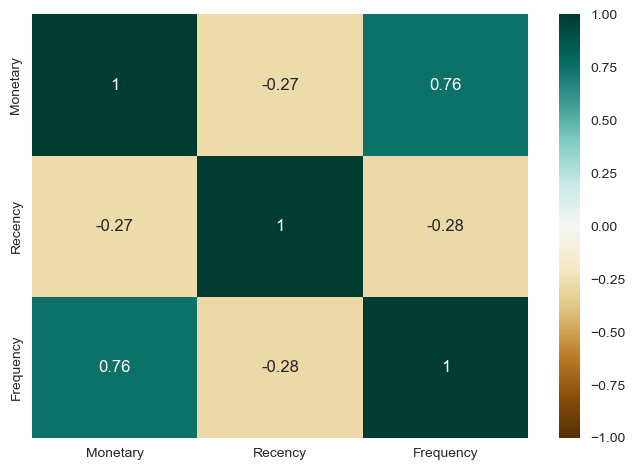

In [119]:
sns.heatmap(rfm_Kmeans.corr(), cmap="BrBG", vmin=-1, vmax=1, annot=True);

C:\Users\furkanpc\AppData\Local\Temp\ipykernel_19080\1729359912.py:1: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



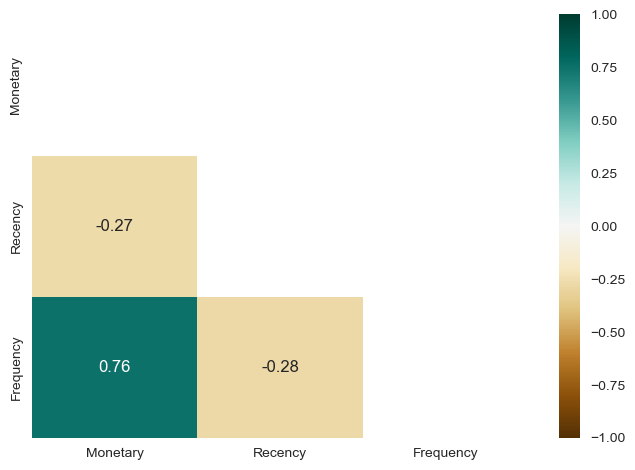

In [120]:
mask = np.triu(np.ones_like(rfm_Kmeans.corr(), dtype=np.bool))
sns.heatmap(rfm_Kmeans.corr(), cmap="BrBG",mask=mask, vmin=-1, vmax=1, annot=True);

In [121]:
sc = MinMaxScaler((0, 1))
rfm_Kmeans_Scale = sc.fit_transform(rfm_Kmeans)
rfm_Kmeans_Scale

array([[0.06936   , 0.00536193, 0.05076142],
       [0.55422247, 0.        , 1.        ],
       [0.07961323, 0.0080429 , 0.02030457],
       ...,
       [0.0027989 , 0.01876676, 0.00507614],
       [0.05062275, 0.0080429 , 0.07614213],
       [0.0249835 , 0.11260054, 0.01015228]])

C:\Users\furkanpc\anaconda3\envs\C12\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=15.

C:\Users\furkanpc\anaconda3\envs\C12\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=15.

C:\Users\furkanpc\anaconda3\envs\C12\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=15.

C:\Users\furkanpc\anaconda3\envs\C12\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning:

KMeans is known to have a memory leak on

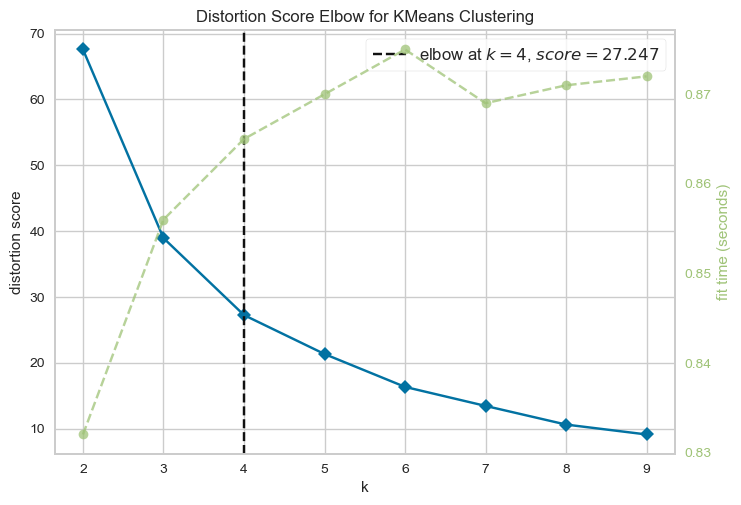

In [122]:
model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,10))

visualizer.fit(rfm_Kmeans_Scale)  # Fit the data to the visualizer
visualizer.poof();

C:\Users\furkanpc\anaconda3\envs\C12\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=15.

C:\Users\furkanpc\anaconda3\envs\C12\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=15.

C:\Users\furkanpc\anaconda3\envs\C12\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=15.

C:\Users\furkanpc\anaconda3\envs\C12\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning:

KMeans is known to have a memory leak on

Text(0.5, 1.0, 'elbow method')

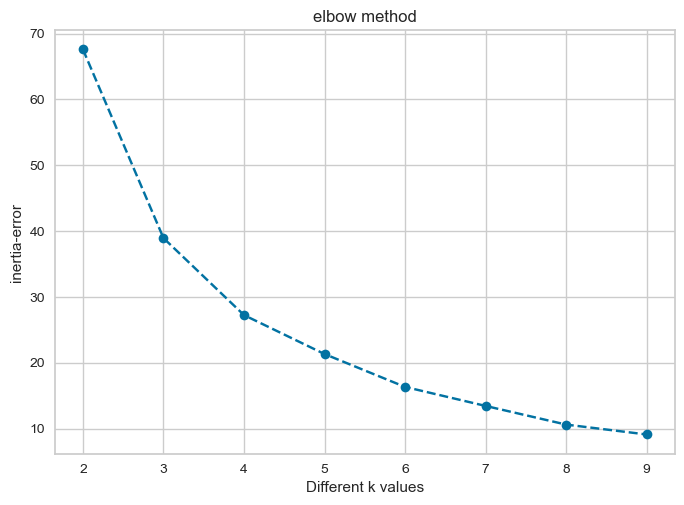

In [123]:
ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters = k, random_state = 42)
    model.fit(rfm_Kmeans_Scale)
    ssd.append(model.inertia_)
    
plt.plot(K, ssd, "bo--")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 

In [124]:
kmeans = KMeans(n_clusters=4)
k_fit = kmeans.fit(rfm_Kmeans_Scale)

C:\Users\furkanpc\anaconda3\envs\C12\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=15.



In [125]:
clusters = k_fit.labels_

In [126]:
segments = pd.DataFrame({"Customer": rfm_Kmeans.index, "Cluster": clusters})

In [127]:
rfm_Kmeans["cluster_no"] = clusters
rfm_Kmeans["cluster_no"] = rfm_Kmeans["cluster_no"] + 1

C:\Users\furkanpc\AppData\Local\Temp\ipykernel_19080\4105439995.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\furkanpc\AppData\Local\Temp\ipykernel_19080\4105439995.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [128]:
rfm_Kmeans

Monetary  Recency  Frequency  cluster_no
CustomerID                                          
12747        2758.31        7         11           1
12748       22027.05        5        198           1
12749        3165.78        8          5           1
12820         923.62        8          4           1
12821          92.72      219          1           4
...              ...      ...        ...         ...
18280         160.70      282          1           2
18281          46.92      185          1           4
18282         113.13       12          2           1
18283        2013.68        8         16           1
18287         994.76       47          3           1

[3793 rows x 4 columns]

In [133]:
centers = np.array(k_fit.cluster_centers_)
centers

array([[0.04085123, 0.05085121, 0.02537801],
       [0.0069302 , 0.82304999, 0.00170797],
       [0.0167467 , 0.2128462 , 0.00792466],
       [0.00994298, 0.51000686, 0.00444957]])

In [129]:
rfm_table['Kmeans_Segment'] = rfm_Kmeans["cluster_no"]

In [130]:
rfm_table

Monetary  Recency  Frequency Recency_Score Frequency_Score  \
CustomerID                                                               
12747        2758.31        7         11             5               5   
12748       22027.05        5        198             5               5   
12749        3165.78        8          5             5               4   
12820         923.62        8          4             5               4   
12821          92.72      219          1             1               1   
...              ...      ...        ...           ...             ...   
18280         160.70      282          1             1               2   
18281          46.92      185          1             1               2   
18282         113.13       12          2             5               3   
18283        2013.68        8         16             5               5   
18287         994.76       47          3             3               4   

           Monetary_Score Rfm_Score          Rfm_Segment  Kmeans_Segment  
CustomerID                                                                
12747                   5        55            Champions               1  
12748                   5        55            Champions               1  
12749                   5        54            Champions               1  
12820                   4        54            Champions               1  
12821                   1        11          Hibernating               4  
...                   ...       ...                  ...             ...  
18280                   1        12          Hibernating               2  
18281                   1        12          Hibernating               4  
18282                   1        53  Potential Loyalists               1  
18283                   5        55            Champions               1  
18287                   4        34      Loyal Customers               1  

[3793 rows x 9 columns]

# Comparesion Rfm vs Kmeans

In [131]:
compare=pd.DataFrame(rfm_table[["Rfm_Segment", "Kmeans_Segment"]].groupby(["Kmeans_Segment", "Rfm_Segment"])["Rfm_Segment"].agg("count"))
compare

Rfm_Segment
Kmeans_Segment Rfm_Segment                     
1              About to Sleep               114
               Champions                    553
               Loyal Customers              583
               Need Attention                73
               New Customers                 38
               Potential Loyalists          429
               Promising                     83
2              At Risk                       52
               Can't Loose                    5
               Hibernating                  368
3              About to Sleep               200
               At Risk                      251
               Can't Loose                   38
               Hibernating                  231
               Loyal Customers              130
               Need Attention                84
4              At Risk                      212
               Can't Loose                   20
               Hibernating                  329

# Cohort Analysis

In [134]:
df_uk_cohort=df_uk[['InvoiceDate','CustomerID','Quantity','TotalPrice']]
df_uk_cohort

InvoiceDate  CustomerID  Quantity  TotalPrice
0      2010-12-01 08:26:00       17850         6       15.30
1      2010-12-01 08:26:00       17850         6       20.34
2      2010-12-01 08:26:00       17850         8       22.00
3      2010-12-01 08:26:00       17850         6       20.34
4      2010-12-01 08:26:00       17850         6       20.34
...                    ...         ...       ...         ...
541889 2011-12-09 12:31:00       15804        12       23.40
541890 2011-12-09 12:49:00       13113         8       23.60
541891 2011-12-09 12:49:00       13113        24       30.00
541892 2011-12-09 12:49:00       13113        24      214.80
541893 2011-12-09 12:49:00       13113        10       70.80

[315832 rows x 4 columns]

In [135]:
# gün bilgileri 1 yaptık
df_uk_cohort['OrderMonth'] = df['InvoiceDate'].apply( lambda x: dt.date(x.year, x.month, 1))
df_uk_cohort

C:\Users\furkanpc\AppData\Local\Temp\ipykernel_19080\2295728935.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



InvoiceDate  CustomerID  Quantity  TotalPrice  OrderMonth
0      2010-12-01 08:26:00       17850         6       15.30  2010-12-01
1      2010-12-01 08:26:00       17850         6       20.34  2010-12-01
2      2010-12-01 08:26:00       17850         8       22.00  2010-12-01
3      2010-12-01 08:26:00       17850         6       20.34  2010-12-01
4      2010-12-01 08:26:00       17850         6       20.34  2010-12-01
...                    ...         ...       ...         ...         ...
541889 2011-12-09 12:31:00       15804        12       23.40  2011-12-01
541890 2011-12-09 12:49:00       13113         8       23.60  2011-12-01
541891 2011-12-09 12:49:00       13113        24       30.00  2011-12-01
541892 2011-12-09 12:49:00       13113        24      214.80  2011-12-01
541893 2011-12-09 12:49:00       13113        10       70.80  2011-12-01

[315832 rows x 5 columns]

In [139]:
# ilk siparişleri bulucaz

user_first_date = df_uk_cohort.groupby('CustomerID')['OrderMonth']

df_uk_cohort['CohortMonth'] = user_first_date.transform(min)

C:\Users\furkanpc\AppData\Local\Temp\ipykernel_19080\401718327.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [140]:
df_uk_cohort

InvoiceDate  CustomerID  Quantity  TotalPrice  OrderMonth  \
0      2010-12-01 08:26:00       17850         6       15.30  2010-12-01   
1      2010-12-01 08:26:00       17850         6       20.34  2010-12-01   
2      2010-12-01 08:26:00       17850         8       22.00  2010-12-01   
3      2010-12-01 08:26:00       17850         6       20.34  2010-12-01   
4      2010-12-01 08:26:00       17850         6       20.34  2010-12-01   
...                    ...         ...       ...         ...         ...   
541889 2011-12-09 12:31:00       15804        12       23.40  2011-12-01   
541890 2011-12-09 12:49:00       13113         8       23.60  2011-12-01   
541891 2011-12-09 12:49:00       13113        24       30.00  2011-12-01   
541892 2011-12-09 12:49:00       13113        24      214.80  2011-12-01   
541893 2011-12-09 12:49:00       13113        10       70.80  2011-12-01   

       CohortMonth  
0       2010-12-01  
1       2010-12-01  
2       2010-12-01  
3       2010-12-01  
4       2010-12-01  
...            ...  
541889  2011-05-01  
541890  2010-12-01  
541891  2010-12-01  
541892  2010-12-01  
541893  2010-12-01  

[315832 rows x 6 columns]

In [141]:
df_uk_cohort['OrderMonth'] = df_uk_cohort['OrderMonth'].astype('datetime64')
df_uk_cohort['CohortMonth'] = df_uk_cohort['CohortMonth'].astype('datetime64')

C:\Users\furkanpc\AppData\Local\Temp\ipykernel_19080\1847482832.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\furkanpc\AppData\Local\Temp\ipykernel_19080\1847482832.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [142]:
# ilk sipariş ile diğer sipariş farkları buluyoruz
# yıl farkı
years_diff = df_uk_cohort['OrderMonth'].dt.year - df_uk_cohort['CohortMonth'].dt.year

# ay farkı
months_diff = df_uk_cohort['OrderMonth'].dt.month - df_uk_cohort['CohortMonth'].dt.month

In [143]:
df_uk_cohort['CohortIndex'] = years_diff * 12 + months_diff + 1

C:\Users\furkanpc\AppData\Local\Temp\ipykernel_19080\1886609388.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [150]:
cohort_data = df_uk_cohort.groupby(['CohortMonth', 'CohortIndex']).agg({'CustomerID':lambda x: x.nunique()})
cohort_data = cohort_data.reset_index()
cohort_data

CohortMonth  CohortIndex  CustomerID
0   2010-12-01            1         771
1   2010-12-01            2         272
2   2010-12-01            3         241
3   2010-12-01            4         277
4   2010-12-01            5         273
5   2010-12-01            6         304
6   2010-12-01            7         274
7   2010-12-01            8         252
8   2010-12-01            9         268
9   2010-12-01           10         296
10  2010-12-01           11         276
11  2010-12-01           12         381
12  2010-12-01           13         198
13  2011-01-01            1         339
14  2011-01-01            2          68
15  2011-01-01            3          88
16  2011-01-01            4          79
17  2011-01-01            5         111
18  2011-01-01            6          94
19  2011-01-01            7          85
20  2011-01-01            8          85
21  2011-01-01            9         104
22  2011-01-01           10         112
23  2011-01-01           11         122
24  2011-01-01           12          42
25  2011-02-01            1         322
26  2011-02-01            2          57
27  2011-02-01            3          63
28  2011-02-01            4          90
29  2011-02-01            5          92
30  2011-02-01            6          80
31  2011-02-01            7          79
32  2011-02-01            8          85
33  2011-02-01            9          87
34  2011-02-01           10          99
35  2011-02-01           11          23
36  2011-03-01            1         411
37  2011-03-01            2          61
38  2011-03-01            3         107
39  2011-03-01            4          82
40  2011-03-01            5          94
41  2011-03-01            6          68
42  2011-03-01            7         107
43  2011-03-01            8          96
44  2011-03-01            9         113
45  2011-03-01           10          36
46  2011-04-01            1         266
47  2011-04-01            2          53
48  2011-04-01            3          54
49  2011-04-01            4          54
50  2011-04-01            5          51
51  2011-04-01            6          61
52  2011-04-01            7          61
53  2011-04-01            8          67
54  2011-04-01            9          19
55  2011-05-01            1         252
56  2011-05-01            2          46
57  2011-05-01            3          44
58  2011-05-01            4          42
59  2011-05-01            5          53
60  2011-05-01            6          55
61  2011-05-01            7          69
62  2011-05-01            8          23
63  2011-06-01            1         203
64  2011-06-01            2          35
65  2011-06-01            3          27
66  2011-06-01            4          49
67  2011-06-01            5          50
68  2011-06-01            6          65
69  2011-06-01            7          21
70  2011-07-01            1         173
71  2011-07-01            2          29
72  2011-07-01            3          36
73  2011-07-01            4          42
74  2011-07-01            5          50
75  2011-07-01            6          21
76  2011-08-01            1         140
77  2011-08-01            2          29
78  2011-08-01            3          32
79  2011-08-01            4          34
80  2011-08-01            5          19
81  2011-09-01            1         267
82  2011-09-01            2          61
83  2011-09-01            3          84
84  2011-09-01            4          34
85  2011-10-01            1         323
86  2011-10-01            2          77
87  2011-10-01            3          36
88  2011-11-01            1         295
89  2011-11-01            2          34
90  2011-12-01            1          31

In [151]:
cohort_user_counts = cohort_data.pivot_table(index='CohortMonth',
                                  columns='CohortIndex',
                                  fill_value=0,
                                  values='CustomerID')
cohort_user_counts

CohortIndex   1    2    3    4    5    6    7    8    9    10   11   12   13
CohortMonth                                                                 
2010-12-01   771  272  241  277  273  304  274  252  268  296  276  381  198
2011-01-01   339   68   88   79  111   94   85   85  104  112  122   42    0
2011-02-01   322   57   63   90   92   80   79   85   87   99   23    0    0
2011-03-01   411   61  107   82   94   68  107   96  113   36    0    0    0
2011-04-01   266   53   54   54   51   61   61   67   19    0    0    0    0
2011-05-01   252   46   44   42   53   55   69   23    0    0    0    0    0
2011-06-01   203   35   27   49   50   65   21    0    0    0    0    0    0
2011-07-01   173   29   36   42   50   21    0    0    0    0    0    0    0
2011-08-01   140   29   32   34   19    0    0    0    0    0    0    0    0
2011-09-01   267   61   84   34    0    0    0    0    0    0    0    0    0
2011-10-01   323   77   36    0    0    0    0    0    0    0    0    0    0
2011-11-01   295   34    0    0    0    0    0    0    0    0    0    0    0
2011-12-01    31    0    0    0    0    0    0    0    0    0    0    0    0

In [153]:
cohort_sizes = cohort_user_counts.iloc[:,0]
cohort_sizes

CohortMonth
2010-12-01    771
2011-01-01    339
2011-02-01    322
2011-03-01    411
2011-04-01    266
2011-05-01    252
2011-06-01    203
2011-07-01    173
2011-08-01    140
2011-09-01    267
2011-10-01    323
2011-11-01    295
2011-12-01     31
Name: 1, dtype: int64

In [155]:
retention = cohort_user_counts.divide(cohort_sizes, axis=0)
retention

CohortIndex   1    2    3    4    5    6    7    8    9    10   11   12   13
CohortMonth                                                                 
2010-12-01  1.00 0.35 0.31 0.36 0.35 0.39 0.36 0.33 0.35 0.38 0.36 0.49 0.26
2011-01-01  1.00 0.20 0.26 0.23 0.33 0.28 0.25 0.25 0.31 0.33 0.36 0.12 0.00
2011-02-01  1.00 0.18 0.20 0.28 0.29 0.25 0.25 0.26 0.27 0.31 0.07 0.00 0.00
2011-03-01  1.00 0.15 0.26 0.20 0.23 0.17 0.26 0.23 0.27 0.09 0.00 0.00 0.00
2011-04-01  1.00 0.20 0.20 0.20 0.19 0.23 0.23 0.25 0.07 0.00 0.00 0.00 0.00
2011-05-01  1.00 0.18 0.17 0.17 0.21 0.22 0.27 0.09 0.00 0.00 0.00 0.00 0.00
2011-06-01  1.00 0.17 0.13 0.24 0.25 0.32 0.10 0.00 0.00 0.00 0.00 0.00 0.00
2011-07-01  1.00 0.17 0.21 0.24 0.29 0.12 0.00 0.00 0.00 0.00 0.00 0.00 0.00
2011-08-01  1.00 0.21 0.23 0.24 0.14 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
2011-09-01  1.00 0.23 0.31 0.13 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
2011-10-01  1.00 0.24 0.11 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
2011-11-01  1.00 0.12 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
2011-12-01  1.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00

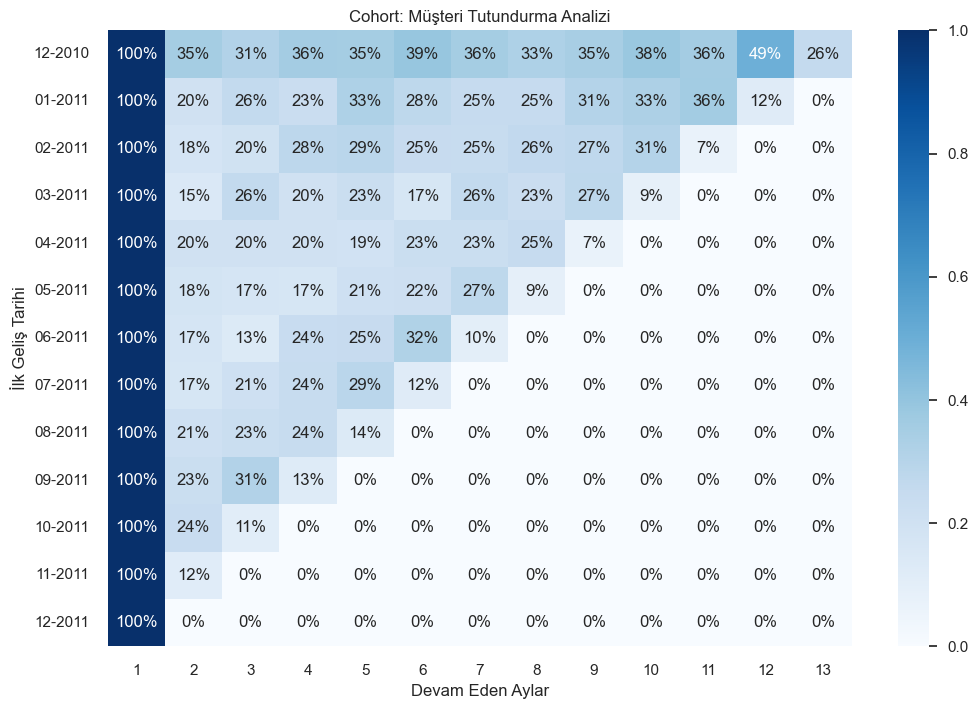

In [156]:
# her bir müşteri için aktiflik yüzdesinin oluşturulması
cohort_sizes = cohort_user_counts.iloc[:,0]
retention = cohort_user_counts.divide(cohort_sizes, axis=0)

# cohort formatının ay ve yıl olarak gösterimi
retention.index = retention.index.strftime('%m-%Y')

# cohort

sns.set(style = 'white')
plt.figure(figsize = (12, 8))
plt.title('Cohort: Müşteri Tutundurma Analizi')

sns.heatmap(
            retention
            ,cmap = plt.cm.Blues
            ,annot = True
            ,fmt = '.0%'
            )
plt.xlabel("Devam Eden Aylar")
plt.ylabel("İlk Geliş Tarihi")
plt.show()

* Elimizde müsterileri kaybetmişiz

In [158]:
cohort_data = df_uk_cohort.groupby(['CohortMonth', 'CohortIndex']).agg({'Quantity':'mean'})
cohort_data = cohort_data.reset_index()
cohort_data

CohortMonth  CohortIndex  Quantity
0   2010-12-01            1      6.31
1   2010-12-01            2      7.55
2   2010-12-01            3      7.00
3   2010-12-01            4      6.73
4   2010-12-01            5      7.01
5   2010-12-01            6      6.79
6   2010-12-01            7      6.62
7   2010-12-01            8      7.12
8   2010-12-01            9      7.14
9   2010-12-01           10      7.34
10  2010-12-01           11      6.85
11  2010-12-01           12      6.36
12  2010-12-01           13      7.11
13  2011-01-01            1      6.44
14  2011-01-01            2      5.52
15  2011-01-01            3      5.69
16  2011-01-01            4      6.24
17  2011-01-01            5      6.96
18  2011-01-01            6      7.35
19  2011-01-01            7      7.76
20  2011-01-01            8      7.36
21  2011-01-01            9      7.40
22  2011-01-01           10      6.55
23  2011-01-01           11      5.97
24  2011-01-01           12      6.70
25  2011-02-01            1      7.65
26  2011-02-01            2      6.91
27  2011-02-01            3      7.29
28  2011-02-01            4      8.11
29  2011-02-01            5      8.32
30  2011-02-01            6      7.91
31  2011-02-01            7      8.97
32  2011-02-01            8      9.48
33  2011-02-01            9      7.29
34  2011-02-01           10      8.20
35  2011-02-01           11      8.36
36  2011-03-01            1      7.35
37  2011-03-01            2      7.88
38  2011-03-01            3      8.23
39  2011-03-01            4      7.48
40  2011-03-01            5      8.45
41  2011-03-01            6      8.85
42  2011-03-01            7      9.33
43  2011-03-01            8      7.33
44  2011-03-01            9      7.03
45  2011-03-01           10      6.28
46  2011-04-01            1      7.85
47  2011-04-01            2      7.90
48  2011-04-01            3      7.16
49  2011-04-01            4      9.00
50  2011-04-01            5      7.89
51  2011-04-01            6      6.83
52  2011-04-01            7      7.67
53  2011-04-01            8      7.03
54  2011-04-01            9      6.62
55  2011-05-01            1      7.66
56  2011-05-01            2      6.41
57  2011-05-01            3      8.67
58  2011-05-01            4      9.89
59  2011-05-01            5      9.54
60  2011-05-01            6      7.11
61  2011-05-01            7      7.82
62  2011-05-01            8      5.90
63  2011-06-01            1      6.94
64  2011-06-01            2      6.70
65  2011-06-01            3      7.63
66  2011-06-01            4      8.53
67  2011-06-01            5      7.15
68  2011-06-01            6      6.46
69  2011-06-01            7      6.29
70  2011-07-01            1      6.86
71  2011-07-01            2      8.97
72  2011-07-01            3      5.89
73  2011-07-01            4      6.60
74  2011-07-01            5      4.77
75  2011-07-01            6      5.90
76  2011-08-01            1      7.59
77  2011-08-01            2      4.63
78  2011-08-01            3      4.36
79  2011-08-01            4      4.89
80  2011-08-01            5      6.40
81  2011-09-01            1      8.21
82  2011-09-01            2      5.24
83  2011-09-01            3      6.52
84  2011-09-01            4      7.85
85  2011-10-01            1      6.37
86  2011-10-01            2      5.48
87  2011-10-01            3      5.88
88  2011-11-01            1      5.78
89  2011-11-01            2      5.54
90  2011-12-01            1      5.90

In [163]:
cohort_user_counts = cohort_data.pivot_table(index='CohortMonth',
                                  columns='CohortIndex',
                                  
                                  values='Quantity')#fill_value=0, grafik 0 oldu
cohort_user_counts

CohortIndex   1    2    3    4    5    6    7    8    9    10   11   12   13
CohortMonth                                                                 
2010-12-01  6.31 7.55 7.00 6.73 7.01 6.79 6.62 7.12 7.14 7.34 6.85 6.36 7.11
2011-01-01  6.44 5.52 5.69 6.24 6.96 7.35 7.76 7.36 7.40 6.55 5.97 6.70  NaN
2011-02-01  7.65 6.91 7.29 8.11 8.32 7.91 8.97 9.48 7.29 8.20 8.36  NaN  NaN
2011-03-01  7.35 7.88 8.23 7.48 8.45 8.85 9.33 7.33 7.03 6.28  NaN  NaN  NaN
2011-04-01  7.85 7.90 7.16 9.00 7.89 6.83 7.67 7.03 6.62  NaN  NaN  NaN  NaN
2011-05-01  7.66 6.41 8.67 9.89 9.54 7.11 7.82 5.90  NaN  NaN  NaN  NaN  NaN
2011-06-01  6.94 6.70 7.63 8.53 7.15 6.46 6.29  NaN  NaN  NaN  NaN  NaN  NaN
2011-07-01  6.86 8.97 5.89 6.60 4.77 5.90  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2011-08-01  7.59 4.63 4.36 4.89 6.40  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2011-09-01  8.21 5.24 6.52 7.85  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2011-10-01  6.37 5.48 5.88  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2011-11-01  5.78 5.54  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2011-12-01  5.90  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN

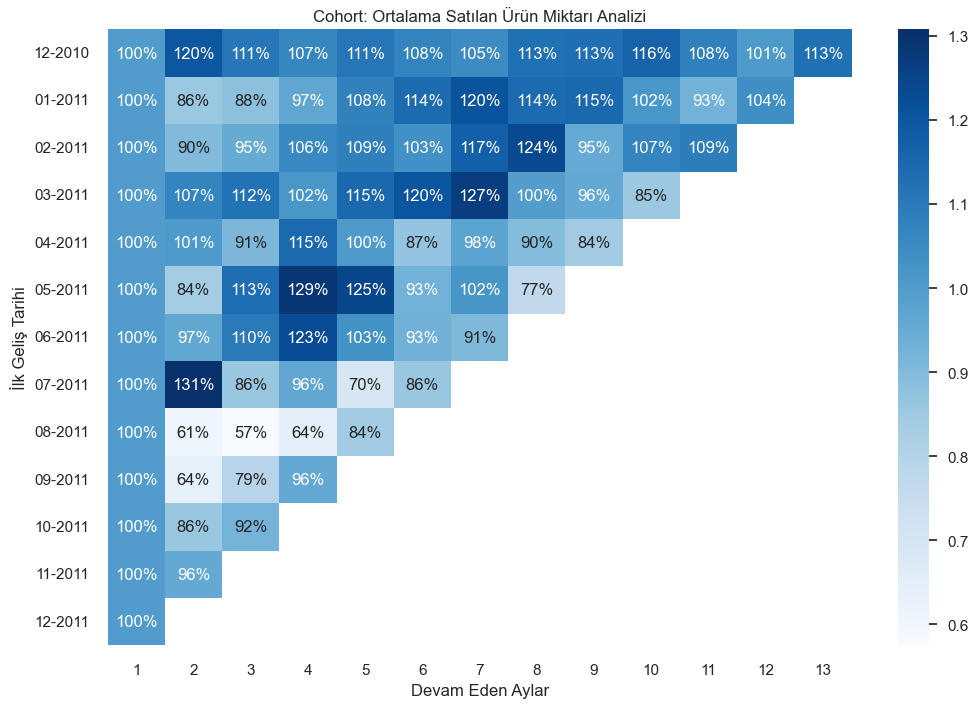

In [164]:
# her bir müşteri için aktiflik yüzdesinin oluşturulması
cohort_sizes = cohort_user_counts.iloc[:,0]
retention = cohort_user_counts.divide(cohort_sizes, axis=0)


# cohort formatının ay ve yıl olarak gösterimi
retention.index = retention.index.strftime('%m-%Y')

# cohort

sns.set(style = 'white')
plt.figure(figsize = (12, 8))
plt.title('Cohort: Ortalama Satılan Ürün Miktarı Analizi')

sns.heatmap(
            retention
            ,cmap = plt.cm.Blues
            ,annot = True
            ,fmt = '.0%'
            )
plt.xlabel("Devam Eden Aylar")
plt.ylabel("İlk Geliş Tarihi")
plt.show()

In [165]:
cohort_data = df_uk_cohort.groupby(['CohortMonth', 'CohortIndex']).agg({'TotalPrice':'mean'})
cohort_data = cohort_data.reset_index()
cohort_data

CohortMonth  CohortIndex  TotalPrice
0   2010-12-01            1       12.95
1   2010-12-01            2       14.05
2   2010-12-01            3       13.30
3   2010-12-01            4       12.45
4   2010-12-01            5       12.40
5   2010-12-01            6       13.09
6   2010-12-01            7       12.38
7   2010-12-01            8       12.09
8   2010-12-01            9       12.80
9   2010-12-01           10       13.66
10  2010-12-01           11       13.32
11  2010-12-01           12       12.14
12  2010-12-01           13       13.28
13  2011-01-01            1       11.78
14  2011-01-01            2       11.95
15  2011-01-01            3       10.63
16  2011-01-01            4       11.33
17  2011-01-01            5       13.31
18  2011-01-01            6       14.00
19  2011-01-01            7       15.71
20  2011-01-01            8       12.94
21  2011-01-01            9       12.77
22  2011-01-01           10       12.98
23  2011-01-01           11       11.72
24  2011-01-01           12       11.25
25  2011-02-01            1       13.58
26  2011-02-01            2       12.50
27  2011-02-01            3       12.52
28  2011-02-01            4       15.08
29  2011-02-01            5       14.63
30  2011-02-01            6       13.10
31  2011-02-01            7       15.63
32  2011-02-01            8       17.91
33  2011-02-01            9       13.50
34  2011-02-01           10       16.07
35  2011-02-01           11       16.74
36  2011-03-01            1       13.22
37  2011-03-01            2       14.95
38  2011-03-01            3       16.33
39  2011-03-01            4       13.56
40  2011-03-01            5       14.97
41  2011-03-01            6       15.05
42  2011-03-01            7       16.84
43  2011-03-01            8       13.47
44  2011-03-01            9       12.26
45  2011-03-01           10        9.97
46  2011-04-01            1       13.28
47  2011-04-01            2       15.90
48  2011-04-01            3       13.77
49  2011-04-01            4       15.02
50  2011-04-01            5       13.38
51  2011-04-01            6       12.12
52  2011-04-01            7       13.04
53  2011-04-01            8       12.77
54  2011-04-01            9       10.68
55  2011-05-01            1       14.21
56  2011-05-01            2       12.26
57  2011-05-01            3       14.71
58  2011-05-01            4       16.31
59  2011-05-01            5       16.56
60  2011-05-01            6       11.77
61  2011-05-01            7       13.74
62  2011-05-01            8       11.08
63  2011-06-01            1       11.33
64  2011-06-01            2        9.10
65  2011-06-01            3       13.83
66  2011-06-01            4       12.84
67  2011-06-01            5       11.38
68  2011-06-01            6       10.68
69  2011-06-01            7        9.82
70  2011-07-01            1       11.45
71  2011-07-01            2       18.23
72  2011-07-01            3       11.16
73  2011-07-01            4       13.09
74  2011-07-01            5        8.50
75  2011-07-01            6       10.30
76  2011-08-01            1       12.38
77  2011-08-01            2        9.45
78  2011-08-01            3        9.55
79  2011-08-01            4       11.27
80  2011-08-01            5       13.30
81  2011-09-01            1       13.92
82  2011-09-01            2        9.84
83  2011-09-01            3       11.69
84  2011-09-01            4       13.60
85  2011-10-01            1       10.91
86  2011-10-01            2        9.03
87  2011-10-01            3       10.14
88  2011-11-01            1        9.35
89  2011-11-01            2        8.29
90  2011-12-01            1        7.36

In [167]:
cohort_user_counts = cohort_data.pivot_table(index='CohortMonth',
                                  columns='CohortIndex',
                                  
                                  values='TotalPrice')#fill_value=0, grafik 0 oldu
cohort_user_counts

CohortIndex    1     2     3     4     5     6     7     8     9     10    11  \
CohortMonth                                                                     
2010-12-01  12.95 14.05 13.30 12.45 12.40 13.09 12.38 12.09 12.80 13.66 13.32   
2011-01-01  11.78 11.95 10.63 11.33 13.31 14.00 15.71 12.94 12.77 12.98 11.72   
2011-02-01  13.58 12.50 12.52 15.08 14.63 13.10 15.63 17.91 13.50 16.07 16.74   
2011-03-01  13.22 14.95 16.33 13.56 14.97 15.05 16.84 13.47 12.26  9.97   NaN   
2011-04-01  13.28 15.90 13.77 15.02 13.38 12.12 13.04 12.77 10.68   NaN   NaN   
2011-05-01  14.21 12.26 14.71 16.31 16.56 11.77 13.74 11.08   NaN   NaN   NaN   
2011-06-01  11.33  9.10 13.83 12.84 11.38 10.68  9.82   NaN   NaN   NaN   NaN   
2011-07-01  11.45 18.23 11.16 13.09  8.50 10.30   NaN   NaN   NaN   NaN   NaN   
2011-08-01  12.38  9.45  9.55 11.27 13.30   NaN   NaN   NaN   NaN   NaN   NaN   
2011-09-01  13.92  9.84 11.69 13.60   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2011-10-01  10.91  9.03 10.14   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2011-11-01   9.35  8.29   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2011-12-01   7.36   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

CohortIndex    12    13  
CohortMonth              
2010-12-01  12.14 13.28  
2011-01-01  11.25   NaN  
2011-02-01    NaN   NaN  
2011-03-01    NaN   NaN  
2011-04-01    NaN   NaN  
2011-05-01    NaN   NaN  
2011-06-01    NaN   NaN  
2011-07-01    NaN   NaN  
2011-08-01    NaN   NaN  
2011-09-01    NaN   NaN  
2011-10-01    NaN   NaN  
2011-11-01    NaN   NaN  
2011-12-01    NaN   NaN

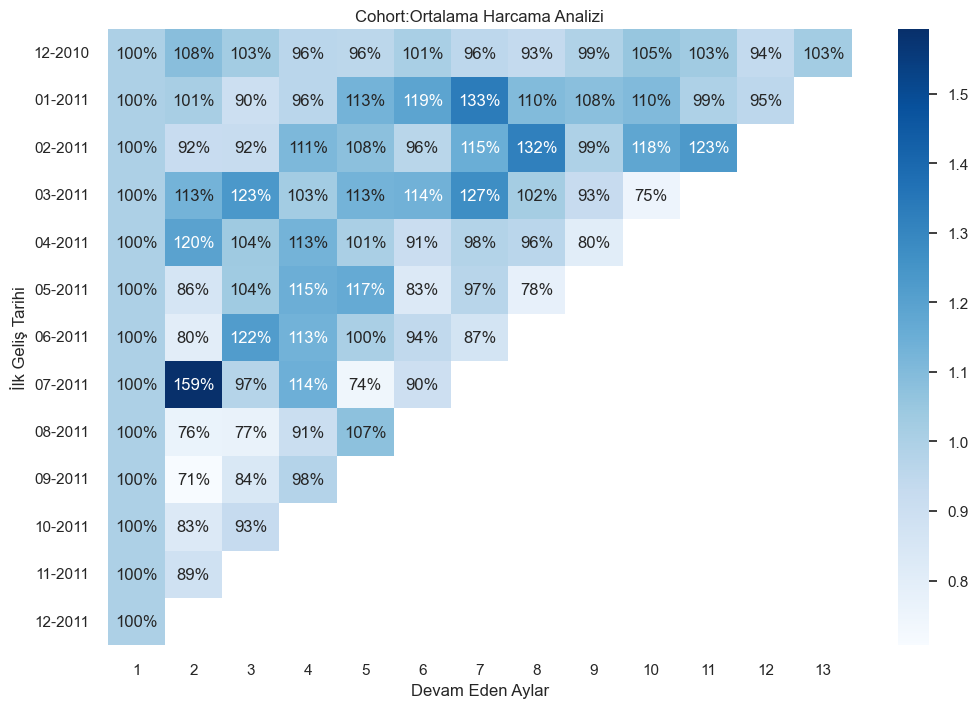

In [168]:
# her bir müşteri için aktiflik yüzdesinin oluşturulması
cohort_sizes = cohort_user_counts.iloc[:,0]
retention = cohort_user_counts.divide(cohort_sizes, axis=0)

# cohort formatının ay ve yıl olarak gösterimi
retention.index = retention.index.strftime('%m-%Y')

# cohort

sns.set(style = 'white')
plt.figure(figsize = (12, 8))
plt.title('Cohort:Ortalama Harcama Analizi')

sns.heatmap(
            retention
            ,cmap = plt.cm.Blues
            ,annot = True
            ,fmt = '.0%'
            )
plt.xlabel("Devam Eden Aylar")
plt.ylabel("İlk Geliş Tarihi")
plt.show()